In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import missingno as msno
import ppscore as pps

In [2]:
data_raw = pd.read_csv("Myocardial infarction complications.csv")

In [4]:
data_raw.shape

(1700, 124)

In [4]:
type(data_raw)

pandas.core.frame.DataFrame

In [5]:
data_raw.dtypes

ID             int64
AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 124, dtype: object

In [6]:
data_raw.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_raw.tail()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1699,1700,63.0,1,2.0,NaN,NaN,NaN,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# Column names
for col_names in data_raw.columns:
    print(col_names)

ID
AGE
SEX
INF_ANAM
STENOK_AN
FK_STENOK
IBS_POST
IBS_NASL
GB
SIM_GIPERT
DLIT_AG
ZSN_A
nr_11
nr_01
nr_02
nr_03
nr_04
nr_07
nr_08
np_01
np_04
np_05
np_07
np_08
np_09
np_10
endocr_01
endocr_02
endocr_03
zab_leg_01
zab_leg_02
zab_leg_03
zab_leg_04
zab_leg_06
S_AD_KBRIG
D_AD_KBRIG
S_AD_ORIT
D_AD_ORIT
O_L_POST
K_SH_POST
MP_TP_POST
SVT_POST
GT_POST
FIB_G_POST
ant_im
lat_im
inf_im
post_im
IM_PG_P
ritm_ecg_p_01
ritm_ecg_p_02
ritm_ecg_p_04
ritm_ecg_p_06
ritm_ecg_p_07
ritm_ecg_p_08
n_r_ecg_p_01
n_r_ecg_p_02
n_r_ecg_p_03
n_r_ecg_p_04
n_r_ecg_p_05
n_r_ecg_p_06
n_r_ecg_p_08
n_r_ecg_p_09
n_r_ecg_p_10
n_p_ecg_p_01
n_p_ecg_p_03
n_p_ecg_p_04
n_p_ecg_p_05
n_p_ecg_p_06
n_p_ecg_p_07
n_p_ecg_p_08
n_p_ecg_p_09
n_p_ecg_p_10
n_p_ecg_p_11
n_p_ecg_p_12
fibr_ter_01
fibr_ter_02
fibr_ter_03
fibr_ter_05
fibr_ter_06
fibr_ter_07
fibr_ter_08
GIPO_K
K_BLOOD
GIPER_NA
NA_BLOOD
ALT_BLOOD
AST_BLOOD
KFK_BLOOD
L_BLOOD
ROE
TIME_B_S
R_AB_1_n
R_AB_2_n
R_AB_3_n
NA_KB
NOT_NA_KB
LID_KB
NITR_S
NA_R_1_n
NA_R_2_n
NA_R_3_n
NOT_NA_1_n
N

In [9]:
data_raw.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
data_raw.isna().sum().sum() # Total missing values

15974

<AxesSubplot:>

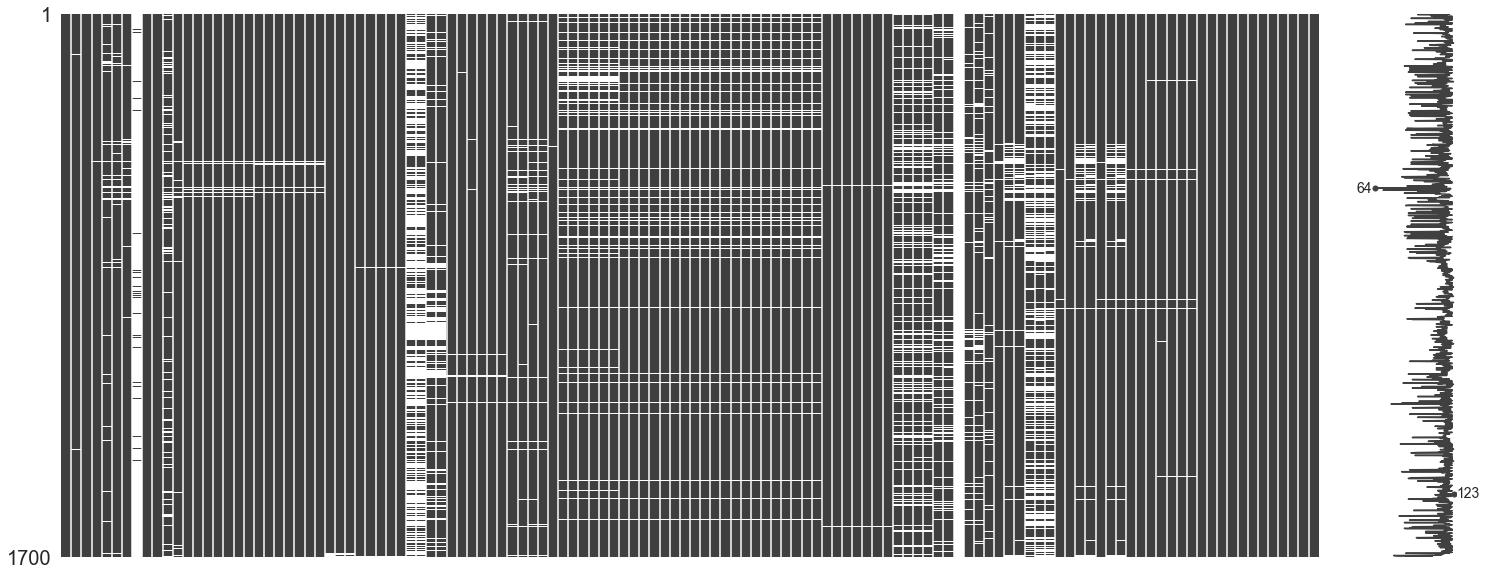

In [11]:
# Whole dataset missing values chart
msno.matrix(data_raw.sort_values("endocr_01"))

# Visualization and missing values

AGE

<AxesSubplot:ylabel='AGE'>

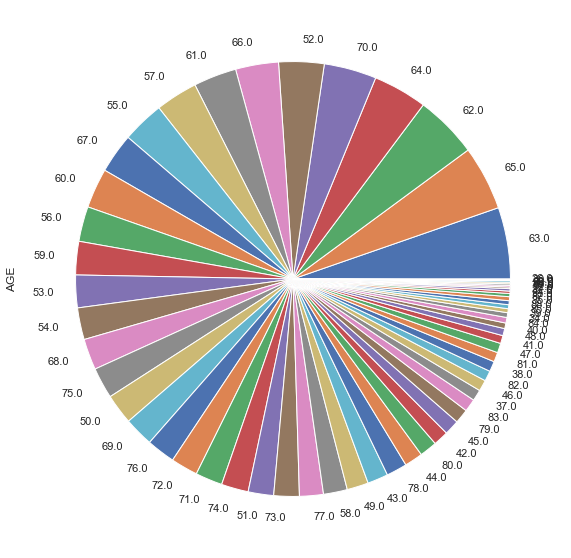

In [44]:
data_raw.AGE.value_counts().plot(kind="pie", figsize=(20,10))

<AxesSubplot:>

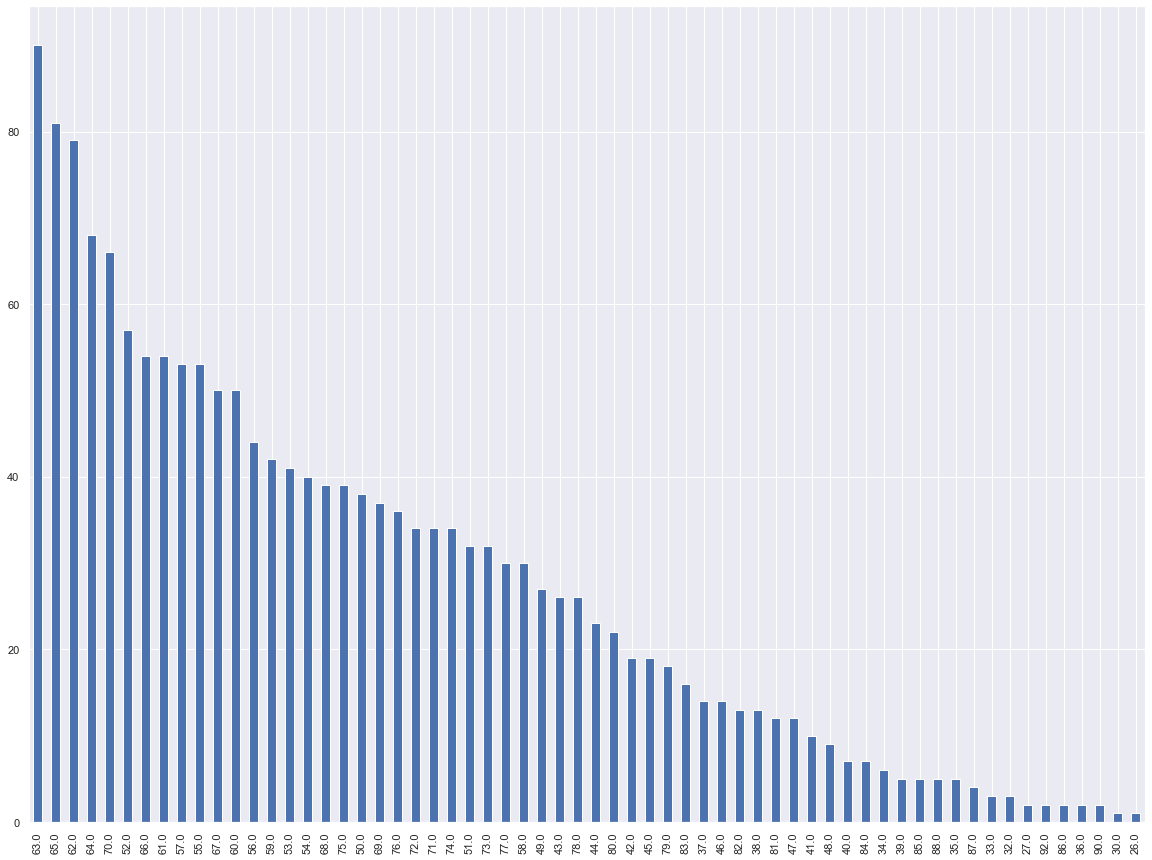

In [47]:
data_raw.AGE.value_counts().plot(kind="bar", figsize=(20,15))

In [35]:
# Missing values
data_raw['AGE'].isna().sum()

8

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

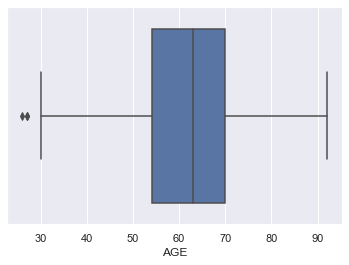

In [59]:
sns.boxplot(data_raw['AGE'])

SEX RATIO IN THE DATAFRAME

<AxesSubplot:ylabel='SEX'>

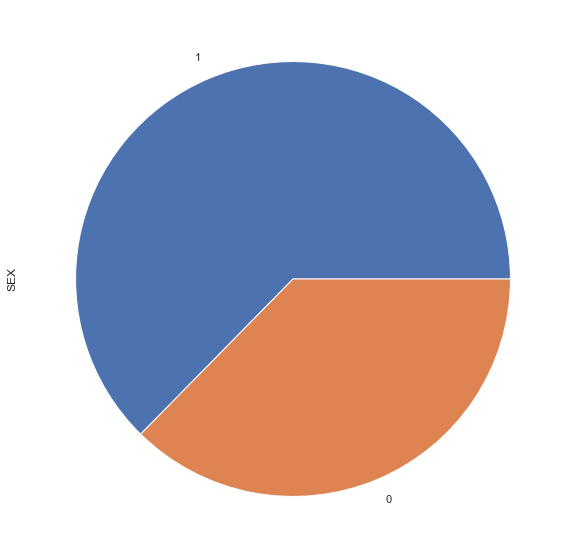

In [24]:
# 0: female
# 1: male
data_raw.SEX.value_counts().plot(kind="pie", figsize=(10,10)) 

In [36]:
# Missing values
data_raw['SEX'].isna().sum()

0

1 - INF_ANAM

<AxesSubplot:>

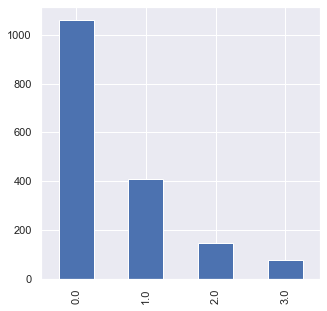

In [28]:
# Quantity of myocardial infarctions in the anamnesis (INF_ANAM)
# 0: zero
# 1: one
# 2: two
# 3: three and more
data_raw.INF_ANAM.value_counts().plot(kind="bar", figsize=(5,5))

In [12]:
data_raw.INF_ANAM.value_counts()

0.0    1060
1.0     410
2.0     147
3.0      79
Name: INF_ANAM, dtype: int64

In [39]:
# Missing values
data_raw['INF_ANAM'].isna().sum()

4

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INF_ANAM'>

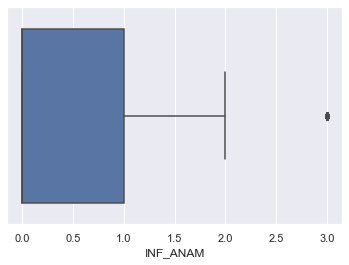

In [61]:
sns.boxplot(data_raw['INF_ANAM'])

STENOK_AN

<AxesSubplot:>

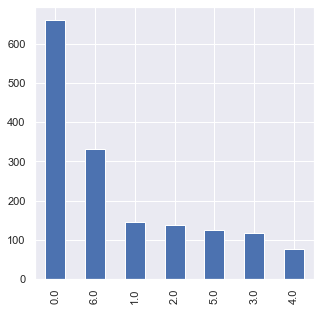

In [29]:
# Exertional angina pectoris in the anamnesis (STENOK_AN)
# 0: never
# 1: during the last year
# 2: one year ago
# 3: two years ago 
# 4: three years ago 
# 5: 4-5 years ago
# 6: more than 5 years ago
data_raw.STENOK_AN.value_counts().plot(kind="bar", figsize=(5,5))

In [41]:
data_raw['STENOK_AN'].isna().sum()

106

Functional class (FC) of angina pectoris in the last year

<AxesSubplot:>

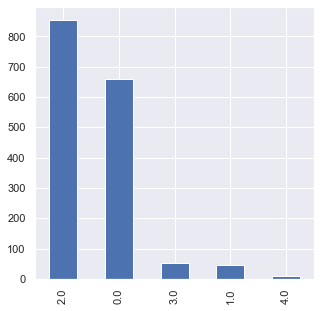

In [30]:
# Functional class (FC) of angina pectoris in the last year (FK_STENOK)
# 0: there is no angina pectoris
# 1: I FC 
# 2: II FC
# 3: III FC
# 4: IV FC
data_raw.FK_STENOK.value_counts().plot(kind="bar", figsize=(5,5))

In [42]:
data_raw['FK_STENOK'].isna().sum()

73

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FK_STENOK'>

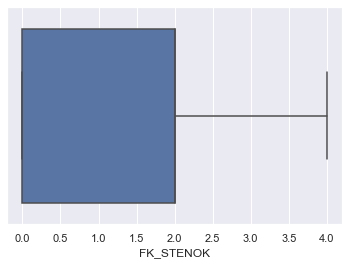

In [63]:
sns.boxplot(data_raw['FK_STENOK'])

Coronary heart disease before admission to hospital

<AxesSubplot:>

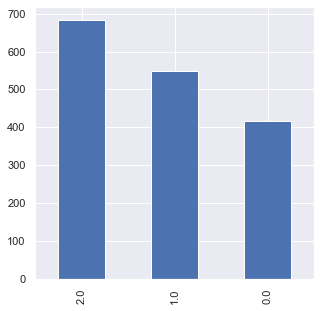

In [31]:
#  Coronary heart disease (CHD) in recent weeks, days before admission to hospital (IBS_POST)
# 0: there was no CHD
# 1: exertional angina pector
# 2: unstable angina pectoris
data_raw.IBS_POST.value_counts().plot(kind="bar", figsize=(5,5))

In [48]:
# Missing values
data_raw['IBS_POST'].isna().sum()

51

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IBS_POST'>

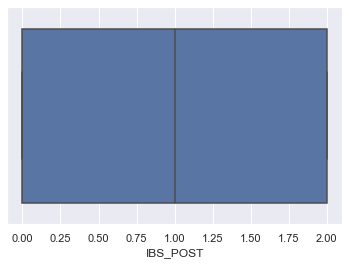

In [64]:
sns.boxplot(data_raw['IBS_POST'])

Heredity on Coronary heart disease (CHD) 

<AxesSubplot:>

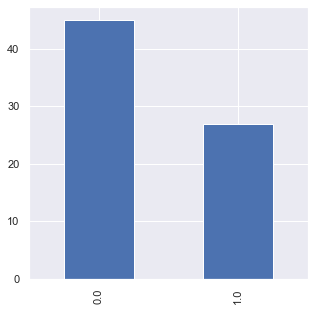

In [32]:
# Heredity on CHD (IBS_NASL)
# 0: isnâ€™t burdened
# 1: burdened
data_raw.IBS_NASL.value_counts().plot(kind="bar", figsize=(5,5)) # most of this column has a na values

In [49]:
# Missing values
data_raw['IBS_NASL'].isna().sum() # Out of 1700 observations 1628 observations is na values

1628

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IBS_NASL'>

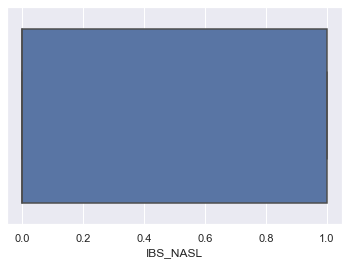

In [65]:
sns.boxplot(data_raw['IBS_NASL'])

Presence of an essential hypertension 

<AxesSubplot:>

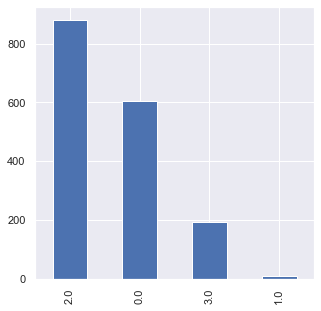

In [33]:
# Presence of an essential hypertension (GB)
# 0: there is no essential hypertension
# 1: Stage 1 
# 2: Stage 2 
# 3: Stage 3
data_raw.GB.value_counts().plot(kind="bar", figsize=(5,5))

In [50]:
# Missing values
data_raw['GB'].isna().sum()

9

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GB'>

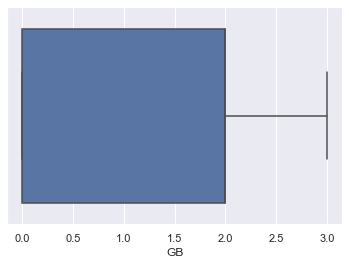

In [66]:
sns.boxplot(data_raw['GB'])

Symptomatic hypertension (SIM_GIPERT)

<AxesSubplot:>

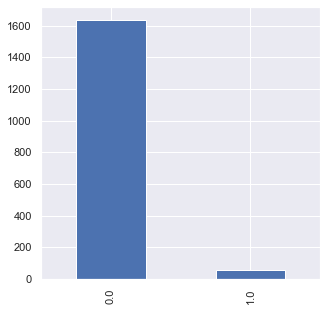

In [51]:
# Symptomatic hypertension (SIM_GIPERT)
# 0: no 
# 1: yes
data_raw.SIM_GIPERT.value_counts().plot(kind="bar", figsize=(5,5))

In [52]:
# Missing values
data_raw['SIM_GIPERT'].isna().sum()

8

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SIM_GIPERT'>

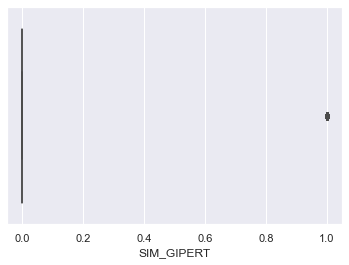

In [67]:
sns.boxplot(data_raw['SIM_GIPERT'])

Duration of arterial hypertension (DLIT_AG)

<AxesSubplot:>

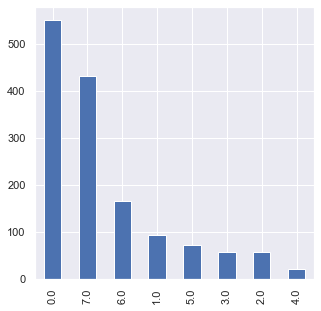

In [53]:
# Duration of arterial hypertension (DLIT_AG)
# 0: there was no arterial hypertension
# 1: one year
# 2: two years
# 3: three years
# 4: four years
# 5: five years 
# 6: 6-10 years
# 7: more than 10 years
data_raw.DLIT_AG.value_counts().plot(kind="bar", figsize=(5,5))

In [54]:
# Missing values
data_raw['DLIT_AG'].isna().sum()

248

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DLIT_AG'>

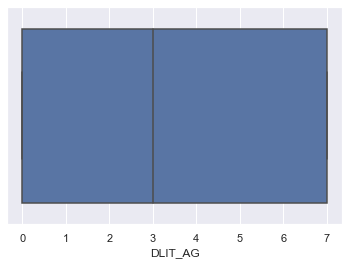

In [68]:
sns.boxplot(data_raw['DLIT_AG'])

Presence of chronic Heart failure (HF) in the anamnesis (ZSN_A)

<AxesSubplot:>

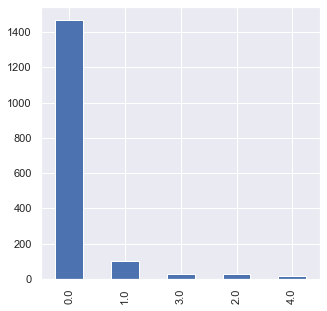

In [55]:
# [Presence of chronic Heart failure (HF) in the anamnesis (ZSN_A): Partially ordered attribute: there are two lines of severities:
# 0<1<2<4,
# 0<1<3<4.
# State 4 means simultaneous states 2 and 3]
# 0: there is no chronic heart failure
# 1: I stage
# 2: IIÐ stage (heart failure due to right ventricular systolic dysfunction)
# 3: IIÐ stage (heart failure due to left ventricular systolic dysfunction)
# 4: IIB stage (heart failure due to left and right ventricular systolic dysfunction)
data_raw.ZSN_A.value_counts().plot(kind="bar", figsize=(5,5))

In [56]:
# Missing values
data_raw['ZSN_A'].isna().sum()

54

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZSN_A'>

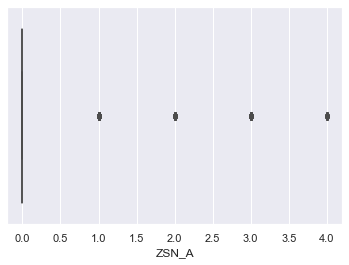

In [69]:
sns.boxplot(data_raw['ZSN_A'])

Observing of arrhythmia in the anamnesis (nr11)

<AxesSubplot:>

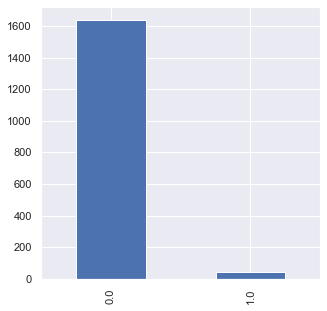

In [71]:
# Observing of arrhythmia in the anamnesis (nr11)
# 0: no
# 1: yes
data_raw.nr_11.value_counts().plot(kind="bar", figsize=(5,5))

In [72]:
# Missing values
data_raw['nr_11'].isna().sum()

21

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr_11'>

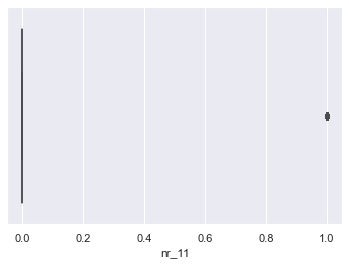

In [73]:
sns.boxplot(data_raw['nr_11'])

Premature atrial contractions in the anamnesis (nr01)

<AxesSubplot:>

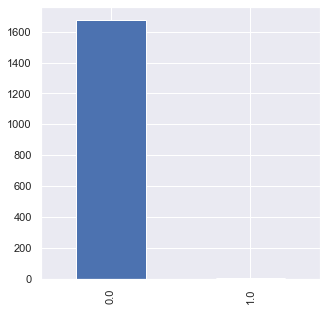

In [74]:
# Premature atrial contractions in the anamnesis (nr01)
# 0: no
# 1: yes
data_raw.nr_01.value_counts().plot(kind="bar", figsize=(5,5))

In [75]:
# Missing values
data_raw['nr_01'].isna().sum()

21

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr_01'>

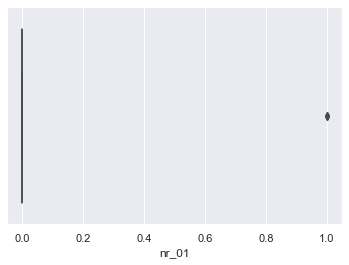

In [76]:
sns.boxplot(data_raw['nr_01'])

Premature ventricular contractions in the anamnesis

<AxesSubplot:ylabel='nr_02'>

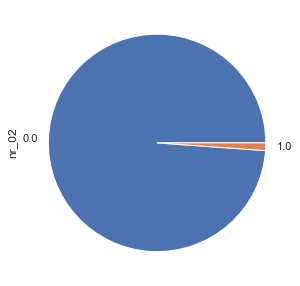

In [82]:
# Premature ventricular contractions in the anamnesis (nr02)
# 0: no
# 1: yes
data_raw.nr_02.value_counts().plot(kind="pie", figsize=(5,5))

In [83]:
# Missing values
data_raw['nr_02'].isna().sum()

21

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr_02'>

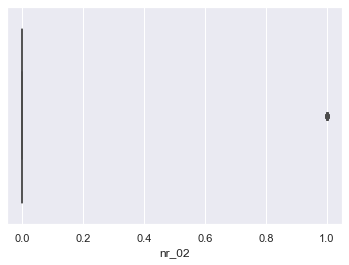

In [84]:
sns.boxplot(data_raw['nr_02'])

Paroxysms of atrial fibrillation in the anamnesis

<AxesSubplot:>

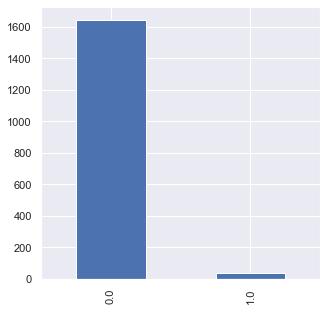

In [86]:
# Paroxysms of atrial fibrillation in the anamnesis (nr03)
# 0: no
# 1: yes
data_raw.nr_03.value_counts().plot(kind="bar", figsize=(5,5))

In [87]:
# Missing values
data_raw['nr_03'].isna().sum()

21

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr_03'>

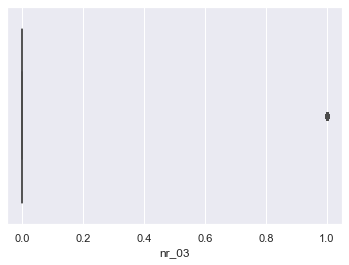

In [88]:
sns.boxplot(data_raw['nr_03'])

A persistent form of atrial fibrillation in the anamnesis (nr04)

<AxesSubplot:>

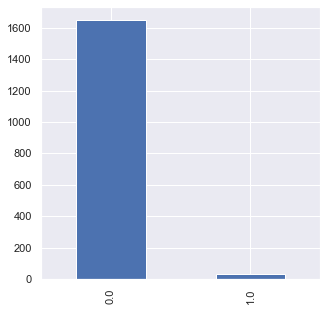

In [96]:
# A persistent form of atrial fibrillation in the anamnesis (nr04)
# 0: no
# 1: yes 
data_raw.nr_04.value_counts().plot(kind="bar", figsize=(5,5))

In [97]:
# Missing values
data_raw['nr_04'].isna().sum()

21

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr_04'>

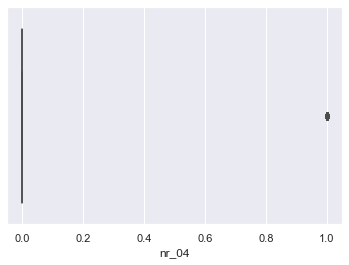

In [98]:
sns.boxplot(data_raw['nr_04'])

Ventricular fibrillation in the anamnesis (nr07)

<AxesSubplot:ylabel='nr_07'>

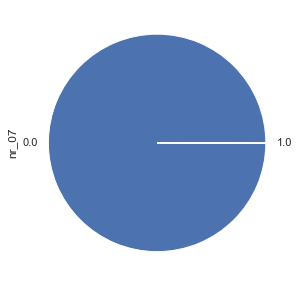

In [100]:
# Ventricular fibrillation in the anamnesis (nr07)
# 0: no 
# 1: yes
data_raw.nr_07.value_counts().plot(kind="pie", figsize=(5,5))

In [101]:
# Missing values
data_raw['nr_07'].isna().sum()

21

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr_07'>

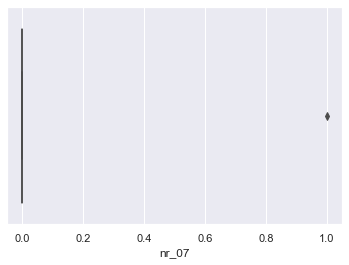

In [102]:
sns.boxplot(data_raw['nr_07'])

Ventricular paroxysmal tachycardia in the anamnesis

<AxesSubplot:ylabel='nr_08'>

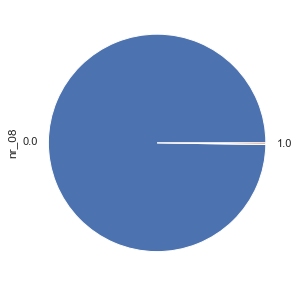

In [103]:
# Ventricular paroxysmal tachycardia in the anamnesis (nr08)
# 0: no
# 1: yes
data_raw.nr_08.value_counts().plot(kind="pie", figsize=(5,5))

In [104]:
# Missing values
data_raw['nr_08'].isna().sum()

21

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nr_08'>

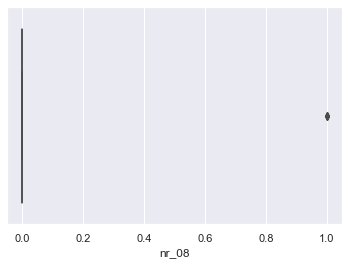

In [105]:
sns.boxplot(data_raw['nr_08'])

First-degree AV block in the anamnesis 

<AxesSubplot:ylabel='np_01'>

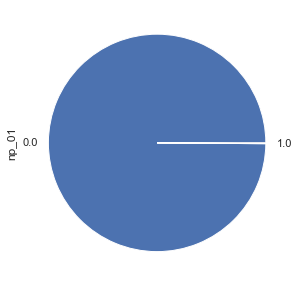

In [116]:
# First-degree AV block in the anamnesis (np01)
# 0: no
# 1: yes
data_raw.np_01.value_counts().plot(kind="pie", figsize=(5,5))

In [117]:
# Missing values
data_raw['np_01'].isna().sum()

18

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='np_01'>

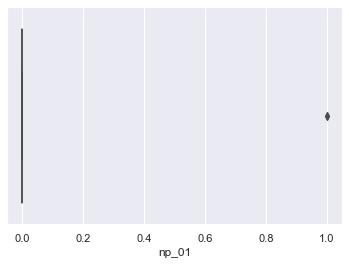

In [118]:
sns.boxplot(data_raw['np_01'])

Third-degree AV block in the anamnesis

<AxesSubplot:ylabel='np_04'>

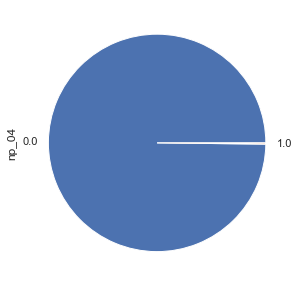

In [120]:
# Third-degree AV block in the anamnesis (np04)
# 0: no 
# 1: yes
data_raw.np_04.value_counts().plot(kind="pie", figsize=(5,5))

In [121]:
# Missing values
data_raw['np_04'].isna().sum()

18

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='np_04'>

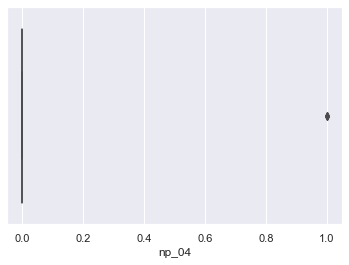

In [122]:
sns.boxplot(data_raw['np_04'])

LBBB (anterior branch) in the anamnesis 

<AxesSubplot:ylabel='np_05'>

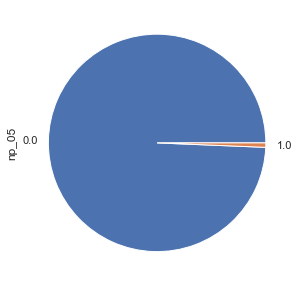

In [124]:
# LBBB (anterior branch) in the anamnesis (np05)
# 0: no 
# 1: yes
data_raw.np_05.value_counts().plot(kind="pie", figsize=(5,5))

In [125]:
# Missing values
data_raw['np_05'].isna().sum()

18

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='np_05'>

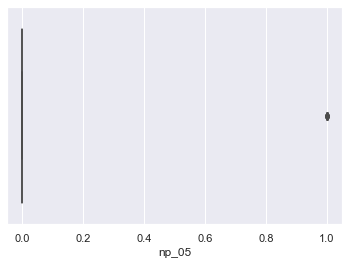

In [126]:
sns.boxplot(data_raw['np_05'])

Incomplete LBBB in the anamnesis

<AxesSubplot:ylabel='np_07'>

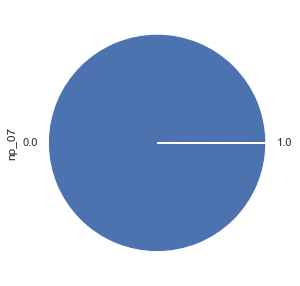

In [127]:
# Incomplete LBBB in the anamnesis (np07)
# 0: no
# 1: yes
data_raw.np_07.value_counts().plot(kind="pie", figsize=(5,5))

In [128]:
# Missing values
data_raw['np_07'].isna().sum()

18

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='np_07'>

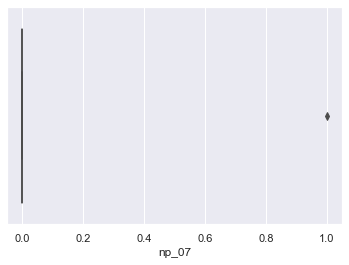

In [129]:
sns.boxplot(data_raw['np_07'])

Complete LBBB in the anamnesis 

<AxesSubplot:ylabel='np_08'>

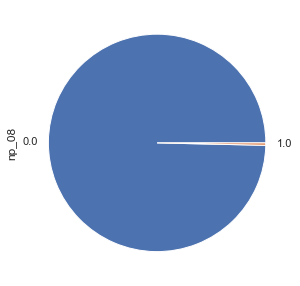

In [130]:
# Complete LBBB in the anamnesis (np08)
# 0: no
# 1: yes
data_raw.np_08.value_counts().plot(kind="pie", figsize=(5,5))

In [131]:
# Missing values
data_raw['np_08'].isna().sum()

18

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='np_08'>

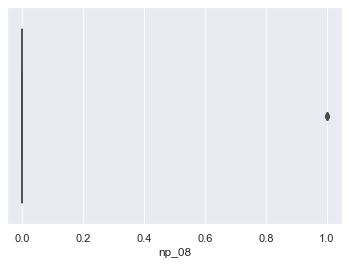

In [132]:
sns.boxplot(data_raw['np_08'])

Incomplete RBBB in the anamnesis

<AxesSubplot:ylabel='np_09'>

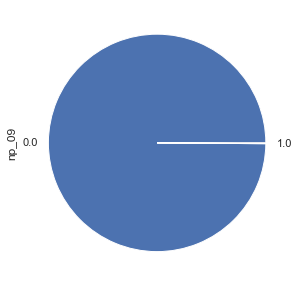

In [133]:
# Incomplete RBBB in the anamnesis (np09)
# 0: no
# 1: yes
data_raw.np_09.value_counts().plot(kind="pie", figsize=(5,5))

In [134]:
# Missing values
data_raw['np_09'].isna().sum()

18

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='np_09'>

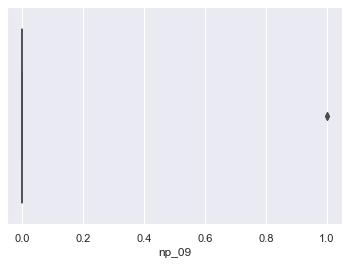

In [135]:
sns.boxplot(data_raw['np_09'])

Complete RBBB in the anamnesis

<AxesSubplot:ylabel='np_10'>

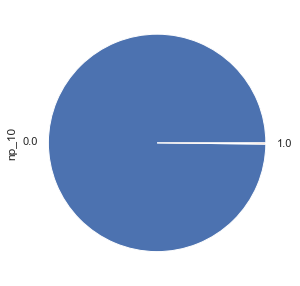

In [136]:
# Complete RBBB in the anamnesis (np10)
# 0: no
# 1: yes
data_raw.np_10.value_counts().plot(kind="pie", figsize=(5,5))

In [137]:
# Missing values
data_raw['np_10'].isna().sum()

18

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='np_10'>

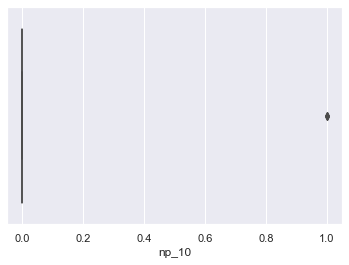

In [138]:
sns.boxplot(data_raw['np_10'])

Diabetes mellitus in the anamnesis

<AxesSubplot:>

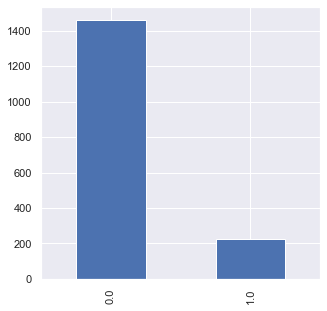

In [140]:
# Diabetes mellitus in the anamnesis (endocr_01)
# 0: no
# 1: yes
data_raw.endocr_01.value_counts().plot(kind="bar", figsize=(5,5))

In [141]:
# Missing values
data_raw['endocr_01'].isna().sum()

11

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='endocr_01'>

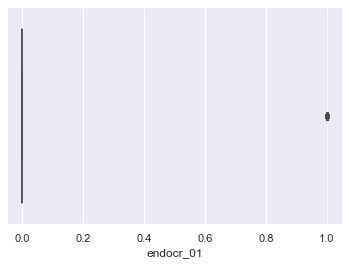

In [142]:
sns.boxplot(data_raw['endocr_01'])

Obesity in the anamnesis

<AxesSubplot:>

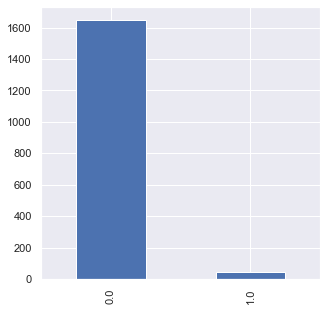

In [143]:
# Obesity in the anamnesis (endocr_02)
# 0: no
# 1: yes
data_raw.endocr_02.value_counts().plot(kind="bar", figsize=(5,5))

In [144]:
# Missing values
data_raw['endocr_02'].isna().sum()

10

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='endocr_02'>

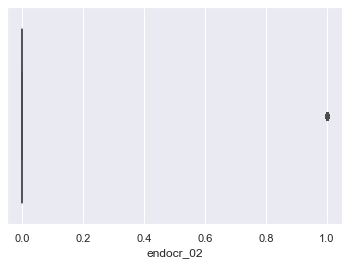

In [145]:
sns.boxplot(data_raw['endocr_02'])

Thyrotoxicosis in the Anamnesis 

<AxesSubplot:>

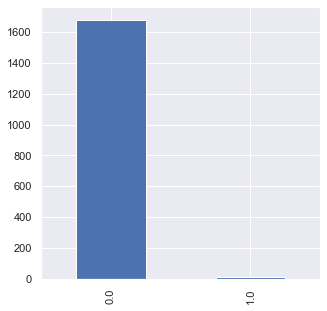

In [147]:
# Thyrotoxicosis in the anamnesis (endocr_03)
# 0: no
# 1: yes
data_raw.endocr_03.value_counts().plot(kind="bar", figsize=(5,5))

In [148]:
# Missing values
data_raw['endocr_03'].isna().sum()

10

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='endocr_03'>

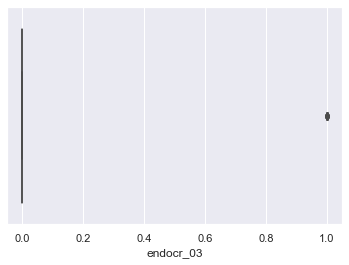

In [149]:
sns.boxplot(data_raw['endocr_03'])

Chronic Bronchitis in the Anamnesis

<AxesSubplot:>

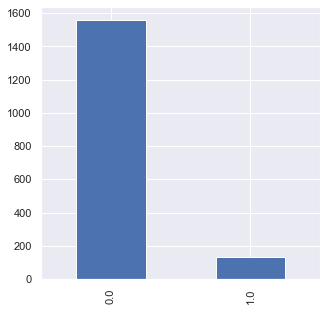

In [150]:
# Chronic bronchitis in the anamnesis (zab_leg_01)
# 0: no 
# 1: yes
data_raw.zab_leg_01.value_counts().plot(kind="bar", figsize=(5,5))

In [151]:
# Missing values
data_raw['zab_leg_01'].isna().sum()

7

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zab_leg_01'>

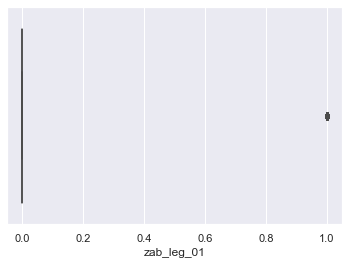

In [152]:
sns.boxplot(data_raw['zab_leg_01'])

Obstructive chronic bronchitis in the anamnesis

<AxesSubplot:>

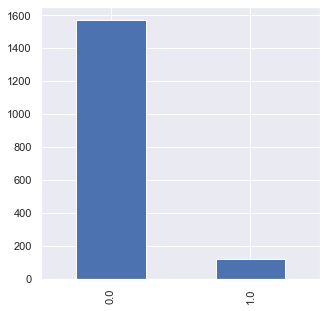

In [153]:
# Obstructive chronic bronchitis in the anamnesis (zab_leg_02)
# 0: no
# 1: yes
data_raw.zab_leg_02.value_counts().plot(kind="bar", figsize=(5,5))

In [154]:
# Missing values
data_raw['zab_leg_02'].isna().sum()

7

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zab_leg_02'>

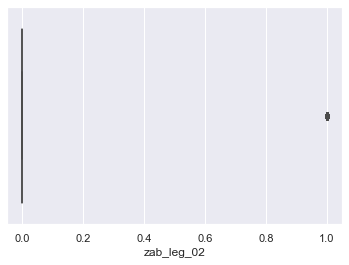

In [155]:
sns.boxplot(data_raw['zab_leg_02'])

Bronchial asthma in the anamnesis

<AxesSubplot:>

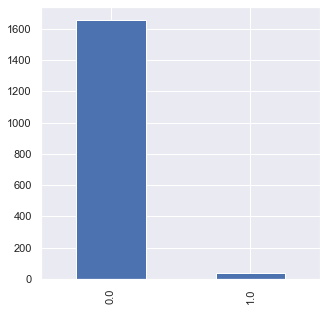

In [156]:
# Bronchial asthma in the anamnesis (zab_leg_03)
# 0: no
# 1: yes
data_raw.zab_leg_03.value_counts().plot(kind="bar", figsize=(5,5))

In [157]:
# Missing values
data_raw['zab_leg_03'].isna().sum()

7

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zab_leg_03'>

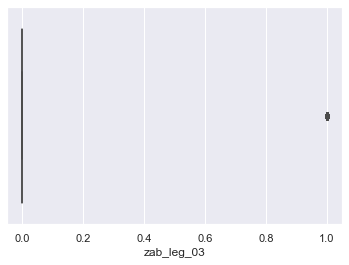

In [158]:
sns.boxplot(data_raw['zab_leg_03'])

Chronic pneumonia in the anamnesis

<AxesSubplot:ylabel='zab_leg_04'>

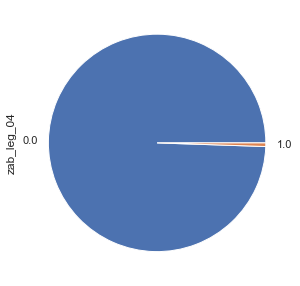

In [160]:
# Chronic pneumonia in the anamnesis (zab_leg_04)
# 0: no
# 1: yes
data_raw.zab_leg_04.value_counts().plot(kind="pie", figsize=(5,5))

In [161]:
# Missing values
data_raw['zab_leg_04'].isna().sum()

7

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zab_leg_04'>

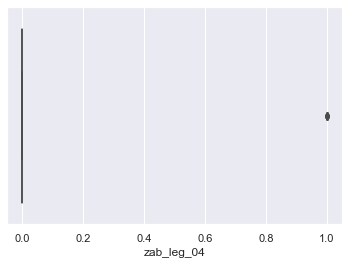

In [162]:
sns.boxplot(data_raw['zab_leg_04'])

Pulmonary tuberculosis in the anamnesis

<AxesSubplot:ylabel='zab_leg_06'>

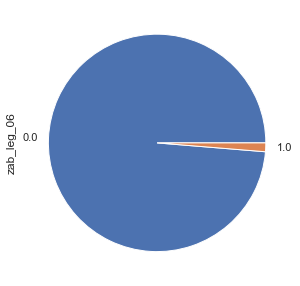

In [163]:
# Pulmonary tuberculosis in the anamnesis (zab_leg_06)
# 0: no
# 1: yes
data_raw.zab_leg_06.value_counts().plot(kind="pie", figsize=(5,5))

In [164]:
#  Missing values
data_raw['zab_leg_06'].isna().sum()

7

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='zab_leg_06'>

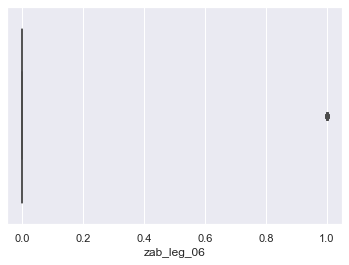

In [165]:
sns.boxplot(data_raw['zab_leg_06'])

Systolic blood pressure

<AxesSubplot:>

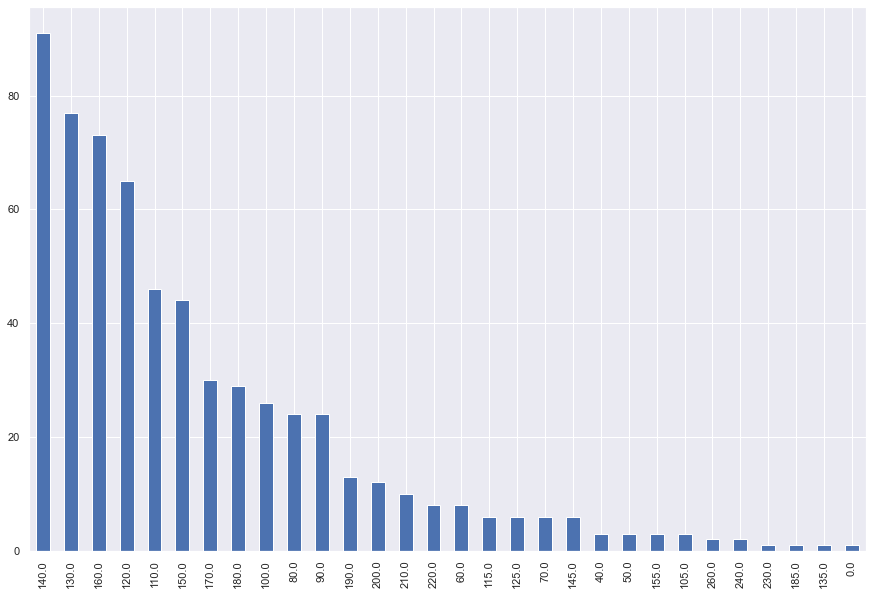

In [171]:
# Systolic blood pressure according to Emergency Cardiology Team (S_AD_KBRIG) (mmHg)
data_raw.S_AD_KBRIG.value_counts().plot(kind="bar", figsize=(15,10))

In [172]:
#  Missing values
data_raw['S_AD_KBRIG'].isna().sum()

1076

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='S_AD_KBRIG'>

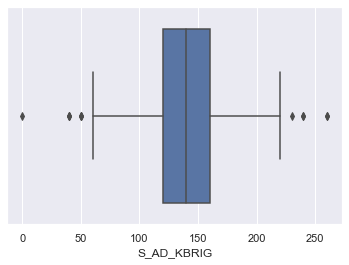

In [173]:
sns.boxplot(data_raw['S_AD_KBRIG']) # It has few outliers to deal with

Diastolic blood pressure

<AxesSubplot:>

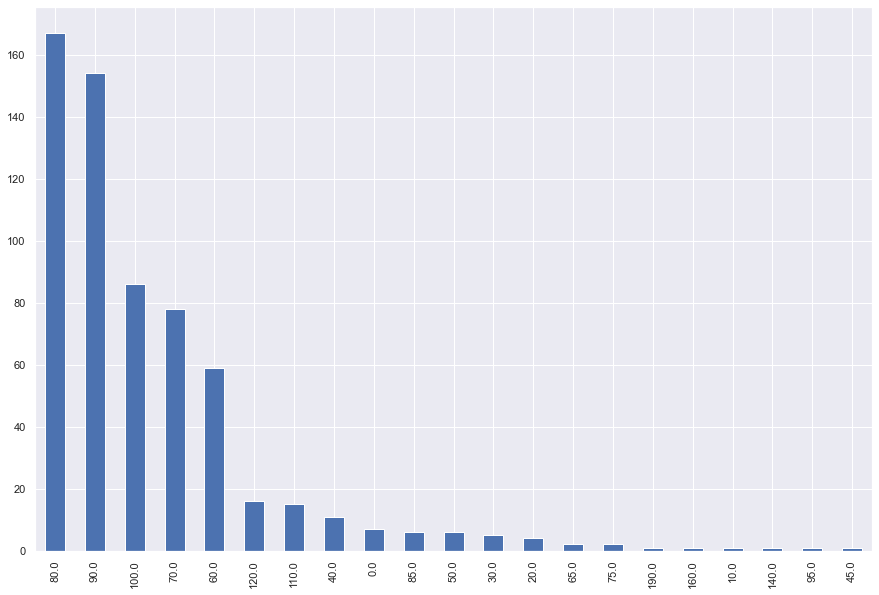

In [174]:
# Diastolic blood pressure according to Emergency Cardiology Team (D_AD_KBRIG) (mmHg)
data_raw.D_AD_KBRIG.value_counts().plot(kind="bar", figsize=(15,10))

In [175]:
#  Missing values
data_raw['D_AD_KBRIG'].isna().sum()

1076

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='D_AD_KBRIG'>

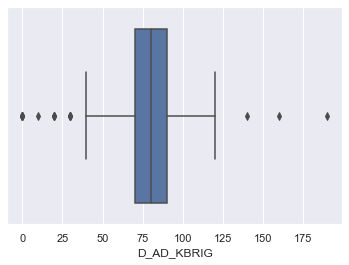

In [176]:
sns.boxplot(data_raw['D_AD_KBRIG'])

Systolic blood pressure according to intensive care unit

<AxesSubplot:>

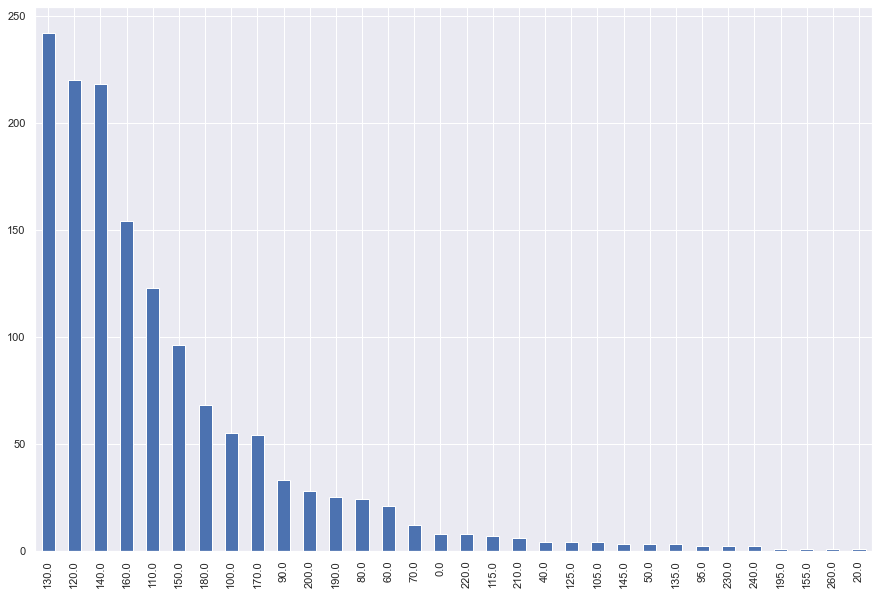

In [177]:
# Systolic blood pressure according to intensive care unit (S_AD_ORIT) (mmHg)
data_raw.S_AD_ORIT.value_counts().plot(kind="bar", figsize=(15,10))

In [178]:
#  Missing values
data_raw['S_AD_ORIT'].isna().sum()

267

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='S_AD_ORIT'>

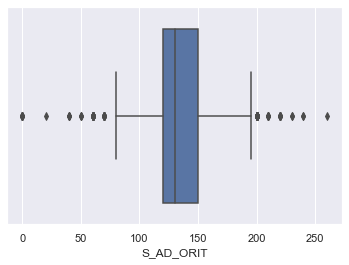

In [179]:
sns.boxplot(data_raw['S_AD_ORIT'])

Diastolic blood pressure according to intensive care unit

<AxesSubplot:>

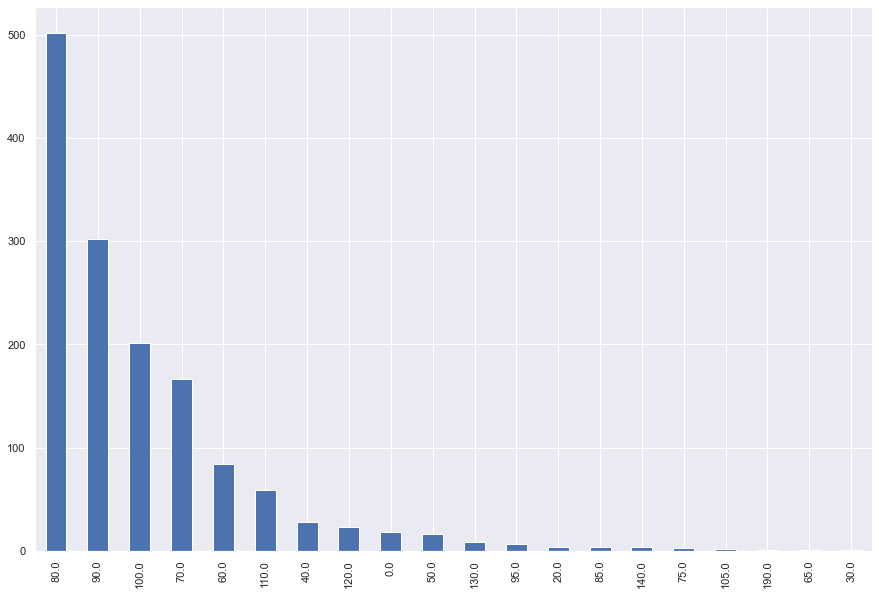

In [182]:
# Diastolic blood pressure according to intensive care unit (D_AD_ORIT) (mmHg)
data_raw.D_AD_ORIT.value_counts().plot(kind="bar", figsize=(15,10))

In [184]:
#  Missing values
data_raw['D_AD_ORIT'].isna().sum()

267

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='D_AD_ORIT'>

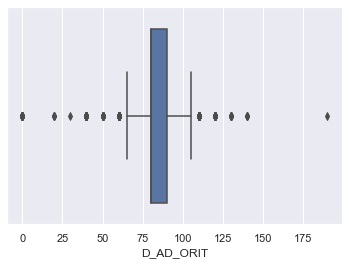

In [185]:
sns.boxplot(data_raw['D_AD_ORIT'])

Pulmonary edema at the time of admission to intensive care unit

<AxesSubplot:>

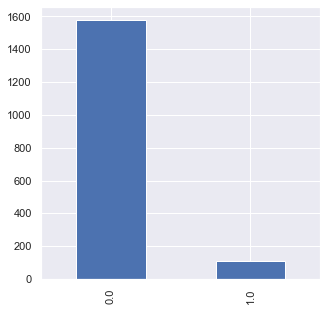

In [188]:
# Pulmonary edema at the time of admission to intensive care unit (O_L_POST)
# 0: no
# 1: yes
data_raw.O_L_POST.value_counts().plot(kind="bar", figsize=(5,5))

In [189]:
#  Missing values
data_raw['O_L_POST'].isna().sum()

12

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='O_L_POST'>

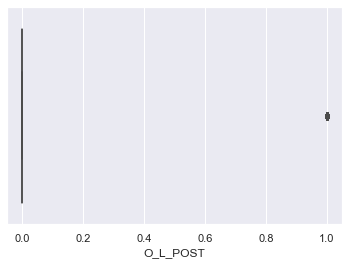

In [190]:
sns.boxplot(data_raw['O_L_POST'])

Cardiogenic shock at the time of admission to intensive care unit

<AxesSubplot:>

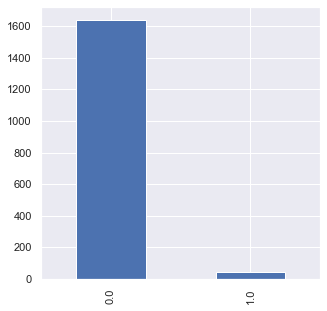

In [191]:
# Cardiogenic shock at the time of admission to intensive care unit (K_SH_POST)
# 0: no
# 1: yes
data_raw.K_SH_POST.value_counts().plot(kind="bar", figsize=(5,5))

In [192]:
#  Missing values
data_raw['K_SH_POST'].isna().sum()

15

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K_SH_POST'>

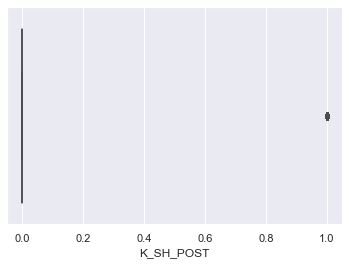

In [193]:
sns.boxplot(data_raw['K_SH_POST'])

Paroxysms of atrial fibrillation at the time of admission to intensive care unit, (or at a pre-hospital stage)

<AxesSubplot:>

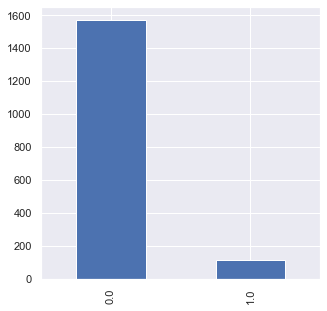

In [194]:
# Paroxysms of atrial fibrillation at the time of admission to intensive care unit, (or at a pre-hospital stage) (MP_TP_POST)
# 0: no
# 1: yes
data_raw.MP_TP_POST.value_counts().plot(kind="bar", figsize=(5,5))

In [195]:
#  Missing values
data_raw['MP_TP_POST'].isna().sum()

14

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MP_TP_POST'>

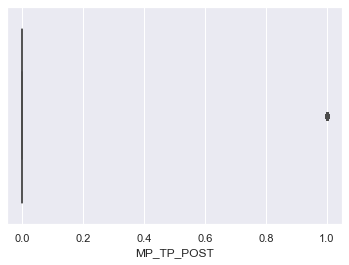

In [196]:
sns.boxplot(data_raw['MP_TP_POST'])

Paroxysms of supraventricular tachycardia at the time of admission to intensive care unit, (or at a pre-hospital stage)

<AxesSubplot:ylabel='SVT_POST'>

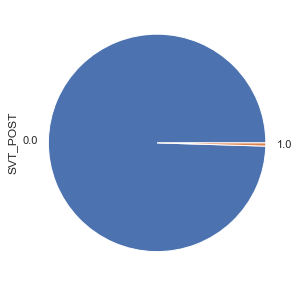

In [198]:
# Paroxysms of supraventricular tachycardia at the time of admission to intensive care unit, (or at a pre-hospital stage) (SVT_POST)
# 0: no 1680
# 1: yes
data_raw.SVT_POST.value_counts().plot(kind="pie", figsize=(5,5))

In [199]:
#  Missing values
data_raw['SVT_POST'].isna().sum()

12

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SVT_POST'>

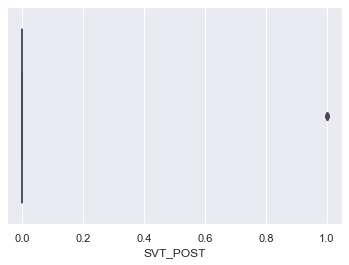

In [200]:
sns.boxplot(data_raw['SVT_POST'])

Paroxysms of ventricular tachycardia at the time of admission to intensive care unit, (or at a pre-hospital stage)

<AxesSubplot:ylabel='GT_POST'>

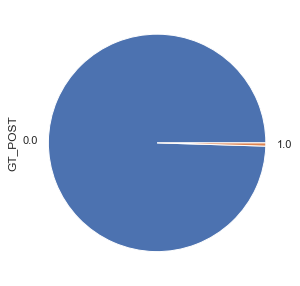

In [201]:
# Paroxysms of ventricular tachycardia at the time of admission to intensive care unit, (or at a pre-hospital stage) (GT_POST)
# 0: no
# 1: yes
data_raw.GT_POST.value_counts().plot(kind="pie", figsize=(5,5))

In [202]:
#  Missing values
data_raw['GT_POST'].isna().sum()

12

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GT_POST'>

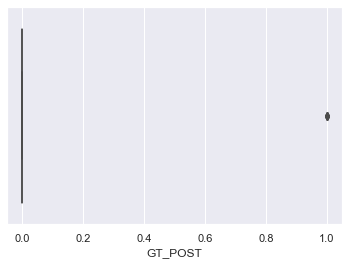

In [203]:
sns.boxplot(data_raw['GT_POST'])

Ventricular fibrillation at the time of admission 

<AxesSubplot:ylabel='FIB_G_POST'>

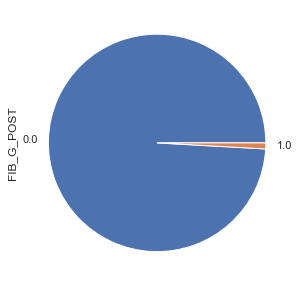

In [204]:
# Ventricular fibrillation at the time of admission to intensive care unit, (or at a pre-hospital stage) (FIB_G_POST)
# 0: no
# 1: yes
data_raw.FIB_G_POST.value_counts().plot(kind="pie", figsize=(5,5))

In [205]:
#  Missing values
data_raw['FIB_G_POST'].isna().sum()

12

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FIB_G_POST'>

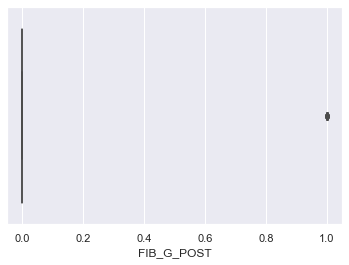

In [206]:
sns.boxplot(data_raw['FIB_G_POST'])

Presence of an anterior myocardial infarction (left ventricular)

<AxesSubplot:>

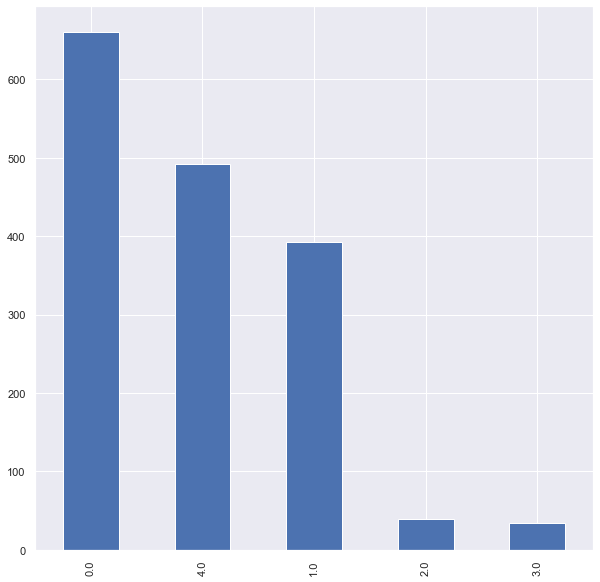

In [211]:
# Presence of an anterior myocardial infarction (left ventricular) (ECG changes in leads V1: V4 ) (ant_im)
# 0: there is no infarct in this location
# 1: QRS has no changes
# 2: QRS is like QR-complex 
# 3: QRS is like Qr-complex
# 4: QRS is like QS-complex
data_raw.ant_im.value_counts().plot(kind="bar", figsize=(10,10))

In [212]:
#  Missing values
data_raw['ant_im'].isna().sum()

83

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ant_im'>

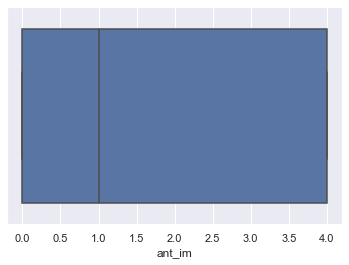

In [213]:
sns.boxplot(data_raw['ant_im'])

Presence of a lateral myocardial infarction (left ventricular) 

<AxesSubplot:>

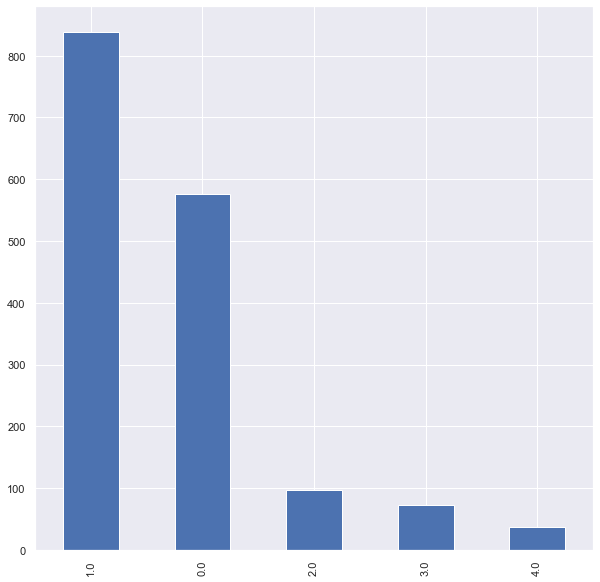

In [214]:
# Presence of a lateral myocardial infarction (left ventricular) (ECG changes in leads V5: V6 , I, AVL) (lat_im)
# 0: there is no infarct in this location
# 1: QRS has no changes
# 2: QRS is like QR-complex
# 3: QRS is like Qr-complex
# 4: QRS is like QS-complex
data_raw.lat_im.value_counts().plot(kind="bar", figsize=(10,10))

In [215]:
#  Missing values
data_raw['lat_im'].isna().sum()

80

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lat_im'>

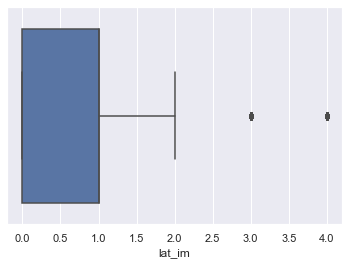

In [216]:
sns.boxplot(data_raw['lat_im'])

Presence of an inferior myocardial infarction (left ventricular)

<AxesSubplot:>

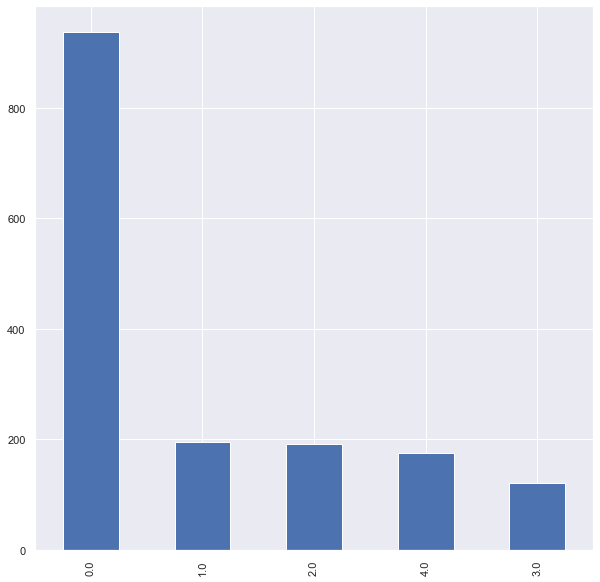

In [217]:
# Presence of an inferior myocardial infarction (left ventricular) (ECG changes in leads III, AVF, II). (inf_im)
# 0: there is no infarct in this location
# 1: QRS has no changes
# 2: QRS is like QR-complex
# 3: QRS is like Qr-complex 
# 4: QRS is like QS-complex 
data_raw.inf_im.value_counts().plot(kind="bar", figsize=(10,10))

In [218]:
#  Missing values
data_raw['inf_im'].isna().sum()

80

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inf_im'>

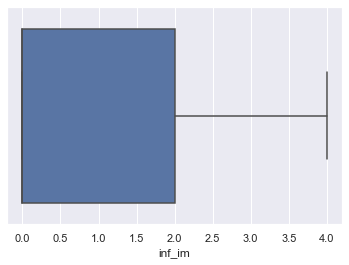

In [219]:
sns.boxplot(data_raw['inf_im'])

Presence of a posterior myocardial infarction (left ventricular)

<AxesSubplot:>

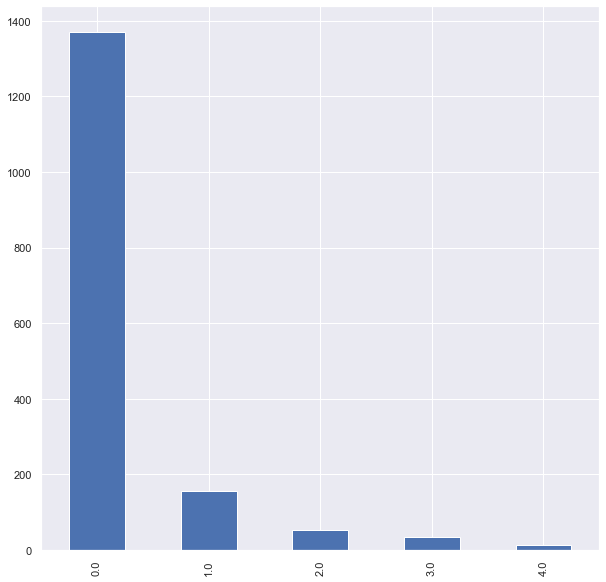

In [220]:
# Presence of a posterior myocardial infarction (left ventricular) (ECG changes in V7: V9, reciprocity changes in leads V1 â€“ V3) (post_im)
# 0: there is no infarct in this location 
# 1: QRS has no changes
# 2: QRS is like QR-complex
# 3: QRS is like Qr-complex
# 4: QRS is like QS-complex 
data_raw.post_im.value_counts().plot(kind="bar", figsize=(10,10))

In [221]:
#  Missing values
data_raw['post_im'].isna().sum()

72

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='post_im'>

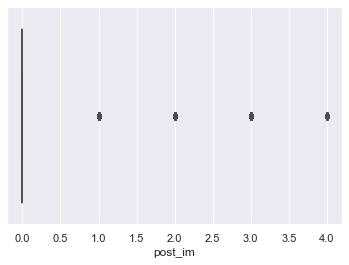

In [222]:
sns.boxplot(data_raw['post_im'])

Presence of a right ventricular myocardial infarction 

<AxesSubplot:>

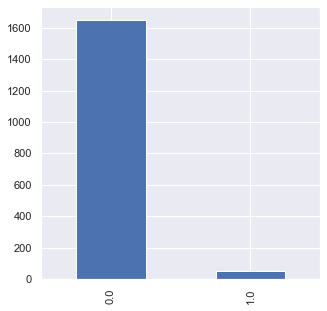

In [224]:
# Presence of a right ventricular myocardial infarction (IM_PG_P)
# 0: no
# 1: yes
data_raw.IM_PG_P.value_counts().plot(kind="bar", figsize=(5,5))

In [225]:
#  Missing values
data_raw['IM_PG_P'].isna().sum()

1

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IM_PG_P'>

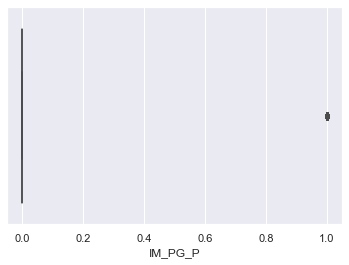

In [226]:
sns.boxplot(data_raw['IM_PG_P'])

ECG rhythm at the time of admission to hospital

<AxesSubplot:>

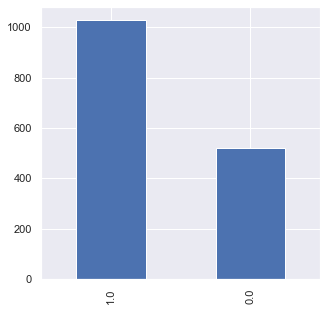

In [228]:
# ECG rhythm at the time of admission to hospital: sinus (with a heart rate 60-90) (ritm_ecg_p_01)
# 0: no 
# 1: yes
data_raw.ritm_ecg_p_01.value_counts().plot(kind="bar", figsize=(5,5))

In [229]:
#  Missing values
data_raw['ritm_ecg_p_01'].isna().sum()

152

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ritm_ecg_p_01'>

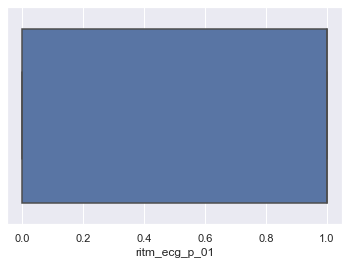

In [230]:
sns.boxplot(data_raw['ritm_ecg_p_01'])

ECG rhythm at the time of admission to hospital

<AxesSubplot:>

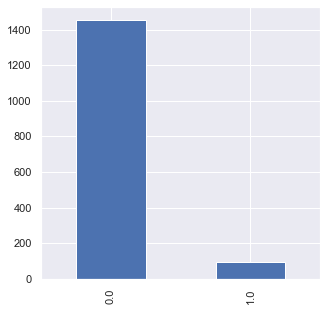

In [12]:
# ECG rhythm at the time of admission to hospital: atrial fibrillation (ritm_ecg_p_02)
# 0: no
# 1: yes
data_raw.ritm_ecg_p_02.value_counts().plot(kind="bar", figsize=(5,5))

In [13]:
#  Missing values
data_raw['ritm_ecg_p_02'].isna().sum()

152

ECG rhythm at the time of admission to hospital: atrial

<AxesSubplot:>

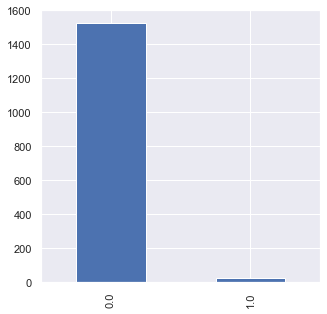

In [14]:
# ECG rhythm at the time of admission to hospital: atrial (ritm_ecg_p_04)
# 0: no
# 1: yes
data_raw.ritm_ecg_p_04.value_counts().plot(kind="bar", figsize=(5,5))

In [15]:
#  Missing values
data_raw['ritm_ecg_p_04'].isna().sum()

152

ECG rhythm at the time of admission to hospital: idioventricular 

<AxesSubplot:ylabel='ritm_ecg_p_06'>

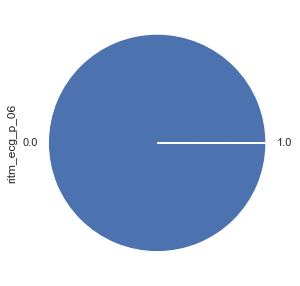

In [18]:
# ECG rhythm at the time of admission to hospital: idioventricular (ritm_ecg_p_06)
# 0: no
# 1: yes
data_raw.ritm_ecg_p_06.value_counts().plot(kind="pie", figsize=(5,5))

In [19]:
#  Missing values
data_raw['ritm_ecg_p_06'].isna().sum()

152

ECG rhythm at the time of admission to hospital: sinus with a heart rate above 90 

<AxesSubplot:>

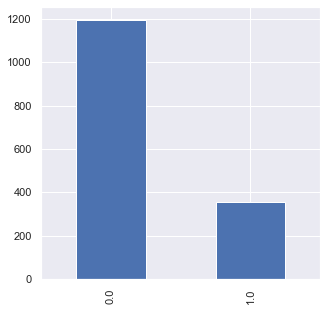

In [21]:
# ECG rhythm at the time of admission to hospital: sinus with a heart rate above 90 (tachycardia) (ritm_ecg_p_07)
# 0: no
# 1: yes
data_raw.ritm_ecg_p_07.value_counts().plot(kind="bar", figsize=(5,5))

In [22]:
#  Missing values
data_raw['ritm_ecg_p_07'].isna().sum()

152

ECG rhythm at the time of admission to hospital: sinus with a heart rate below 60 (bradycardia)

<AxesSubplot:>

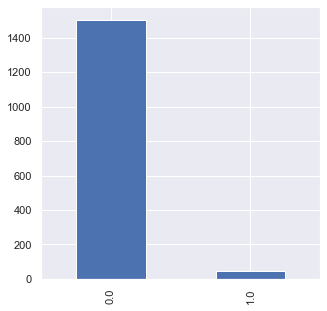

In [23]:
# ECG rhythm at the time of admission to hospital: sinus with a heart rate below 60 (bradycardia) (ritm_ecg_p_08)
# 0: no 
# 1: yes
data_raw.ritm_ecg_p_08.value_counts().plot(kind="bar", figsize=(5,5))

In [24]:
#  Missing values
data_raw['ritm_ecg_p_08'].isna().sum()

152

Premature atrial contractions on ECG at the time of admission to hospital

<AxesSubplot:>

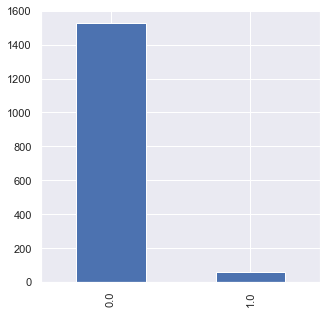

In [25]:
# Premature atrial contractions on ECG at the time of admission to hospital (n_r_ecg_p_01)
# 0: no 
# 1: yes
data_raw.n_r_ecg_p_01.value_counts().plot(kind="bar", figsize=(5,5))

In [26]:
#  Missing values
data_raw['n_r_ecg_p_01'].isna().sum()

115

Frequent premature atrial contractions on ECG at the time of admission to hospital

<AxesSubplot:ylabel='n_r_ecg_p_02'>

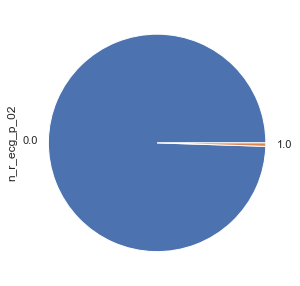

In [29]:
# Frequent premature atrial contractions on ECG at the time of admission to hospital (n_r_ecg_p_02)
# 0: no
# 1: yes
data_raw.n_r_ecg_p_02.value_counts().plot(kind="pie", figsize=(5,5))

In [30]:
data_raw.n_r_ecg_p_02.value_counts()

0.0    1577
1.0       8
Name: n_r_ecg_p_02, dtype: int64

In [31]:
#  Missing values
data_raw['n_r_ecg_p_02'].isna().sum()

115

Premature ventricular contractions on ECG at the time of admission to hospital 

<AxesSubplot:>

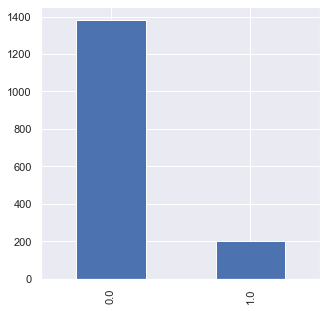

In [34]:
# Premature ventricular contractions on ECG at the time of admission to hospital (n_r_ecg_p_03)
# 0: no 
# 1: yes
data_raw.n_r_ecg_p_03.value_counts().plot(kind="bar", figsize=(5,5))

In [33]:
data_raw.n_r_ecg_p_03.value_counts()

0.0    1381
1.0     204
Name: n_r_ecg_p_03, dtype: int64

In [35]:
#  Missing values
data_raw['n_r_ecg_p_03'].isna().sum()

115

Frequent premature ventricular contractions on ECG at the time of admission to hospital

<AxesSubplot:>

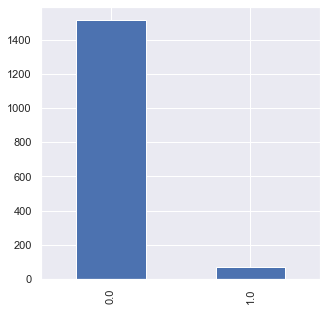

In [36]:
# Frequent premature ventricular contractions on ECG at the time of admission to hospital (n_r_ecg_p_04)
# 0: no
# 1: yes
data_raw.n_r_ecg_p_04.value_counts().plot(kind="bar", figsize=(5,5))

In [37]:
data_raw.n_r_ecg_p_04.value_counts()

0.0    1516
1.0      69
Name: n_r_ecg_p_04, dtype: int64

In [38]:
#  Missing values
data_raw['n_r_ecg_p_04'].isna().sum()

115

Paroxysms of atrial fibrillation on ECG at the time of admission to hospital

<AxesSubplot:>

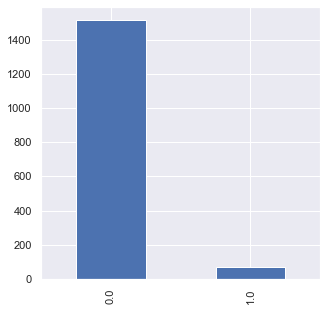

In [40]:
# Paroxysms of atrial fibrillation on ECG at the time of admission to hospital (n_r_ecg_p_05)
# 0: no
# 1: yes
data_raw.n_r_ecg_p_05.value_counts().plot(kind="bar",figsize=(5,5))

In [41]:
data_raw.n_r_ecg_p_05.value_counts()

0.0    1515
1.0      70
Name: n_r_ecg_p_05, dtype: int64

In [42]:
#  Missing values
data_raw['n_r_ecg_p_05'].isna().sum()

115

Persistent form of atrial fibrillation on ECG at the time of admission to hospital 

<AxesSubplot:>

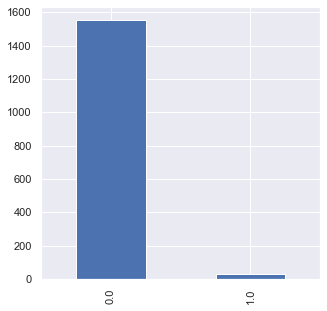

In [44]:
# Persistent form of atrial fibrillation on ECG at the time of admission to hospital (n_r_ecg_p_06)
# 0: no
# 1: yes
data_raw.n_r_ecg_p_06.value_counts().plot(kind="bar",figsize=(5,5))

In [45]:
data_raw.n_r_ecg_p_06.value_counts()

0.0    1553
1.0      32
Name: n_r_ecg_p_06, dtype: int64

In [46]:
#  Missing values
data_raw['n_r_ecg_p_06'].isna().sum()

115

Paroxysms of supraventricular tachycardia on ECG at the time of admission to hospital

<AxesSubplot:ylabel='n_r_ecg_p_08'>

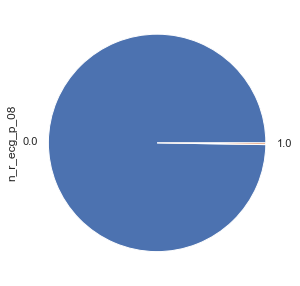

In [49]:
# Paroxysms of supraventricular tachycardia on ECG at the time of admission to hospital (n_r_ecg_p_08)
# 0: no
# 1: yes
data_raw.n_r_ecg_p_08.value_counts().plot(kind="pie",figsize=(5,5))

In [48]:
data_raw.n_r_ecg_p_08.value_counts()

0.0    1581
1.0       4
Name: n_r_ecg_p_08, dtype: int64

In [51]:
# Missing values
data_raw['n_r_ecg_p_08'].isna().sum()

115

Paroxysms of ventricular tachycardia on ECG at the time of admission to hospital

<AxesSubplot:ylabel='n_r_ecg_p_09'>

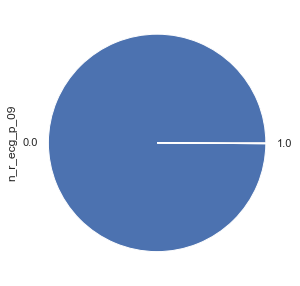

In [54]:
# Paroxysms of ventricular tachycardia on ECG at the time of admission to hospital (n_r_ecg_p_09)
# 0: no
# 1: yes
data_raw.n_r_ecg_p_09.value_counts().plot(kind="pie",figsize=(5,5))

In [55]:
data_raw.n_r_ecg_p_09.value_counts()

0.0    1583
1.0       2
Name: n_r_ecg_p_09, dtype: int64

In [56]:
# Missing values
data_raw['n_r_ecg_p_09'].isna().sum()

115

Ventricular fibrillation on ECG at the time of admission to hospital

<AxesSubplot:ylabel='n_r_ecg_p_10'>

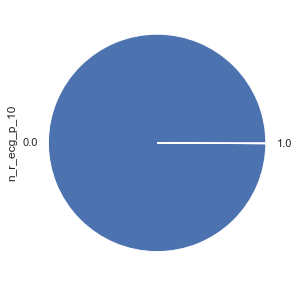

In [57]:
# Ventricular fibrillation on ECG at the time of admission to hospital (n_r_ecg_p_10)
# 0: no
# 1: yes
data_raw.n_r_ecg_p_10.value_counts().plot(kind="pie",figsize=(5,5))

In [58]:
data_raw.n_r_ecg_p_10.value_counts()

0.0    1583
1.0       2
Name: n_r_ecg_p_10, dtype: int64

In [59]:
# Missing values
data_raw['n_r_ecg_p_10'].isna().sum()

115

Sinoatrial block on ECG at the time of admission to hospital 

<AxesSubplot:ylabel='n_p_ecg_p_01'>

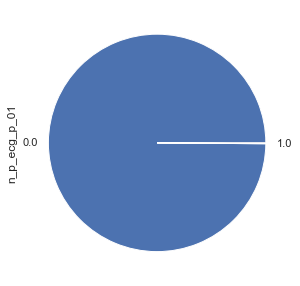

In [60]:
# Sinoatrial block on ECG at the time of admission to hospital (n_p_ecg_p_01)
# 0: no
# 1: yes
data_raw.n_p_ecg_p_01.value_counts().plot(kind="pie",figsize=(5,5))

In [61]:
data_raw.n_p_ecg_p_01.value_counts()

0.0    1583
1.0       2
Name: n_p_ecg_p_01, dtype: int64

In [64]:
# Missing values
data_raw['n_r_ecg_p_01'].isna().sum()

115

First-degree AV block on ECG at the time of admission to hospital

<AxesSubplot:ylabel='n_p_ecg_p_03'>

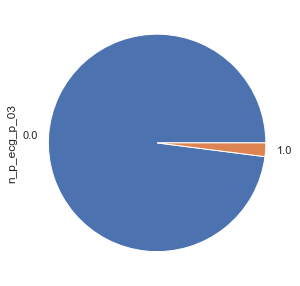

In [62]:
# First-degree AV block on ECG at the time of admission to hospital (n_p_ecg_p_03)
# 0: no
# 1: yes
data_raw.n_p_ecg_p_03.value_counts().plot(kind="pie",figsize=(5,5))

In [63]:
data_raw.n_p_ecg_p_03.value_counts()

0.0    1553
1.0      32
Name: n_p_ecg_p_03, dtype: int64

In [65]:
# Missing values
data_raw['n_r_ecg_p_03'].isna().sum()

115

67 - Type 1 Second-degree AV block (Mobitz I/Wenckebach) on ECG at the time of admission to hospital

<AxesSubplot:ylabel='n_p_ecg_p_04'>

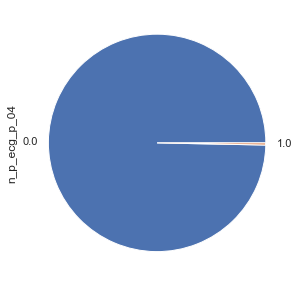

In [66]:
# Type 1 Second-degree AV block (Mobitz I/Wenckebach) on ECG at the time of admission to hospital (n_p_ecg_p_04)
# 0: no 
# 1: yes
data_raw.n_p_ecg_p_04.value_counts().plot(kind="pie",figsize=(5,5))

In [67]:
data_raw.n_p_ecg_p_04.value_counts()

0.0    1580
1.0       5
Name: n_p_ecg_p_04, dtype: int64

In [68]:
# Missing values
data_raw['n_r_ecg_p_04'].isna().sum()

115

68 - Type 2 Second-degree AV block (Mobitz II/Hay) on ECG at the time of admission to hospital

<AxesSubplot:ylabel='n_p_ecg_p_05'>

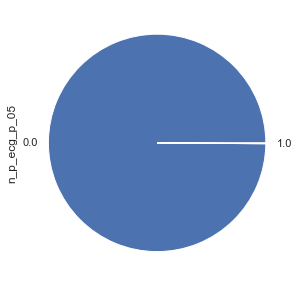

In [69]:
#  Type 2 Second-degree AV block (Mobitz II/Hay) on ECG at the time of admission to hospital (n_p_ecg_p_05)
# 0: no 
# 1: yes
data_raw.n_p_ecg_p_05.value_counts().plot(kind="pie",figsize=(5,5))

In [70]:
data_raw.n_p_ecg_p_05.value_counts()

0.0    1583
1.0       2
Name: n_p_ecg_p_05, dtype: int64

In [71]:
# Missing values
data_raw['n_r_ecg_p_05'].isna().sum()

115

69 - Third-degree AV block on ECG at the time of admission to hospital

<AxesSubplot:ylabel='n_p_ecg_p_06'>

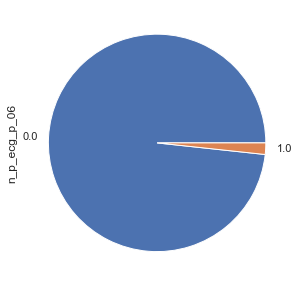

In [72]:
# Third-degree AV block on ECG at the time of admission to hospital (n_p_ecg_p_06)
# 0: no
# 1: yes
data_raw.n_p_ecg_p_06.value_counts().plot(kind="pie",figsize=(5,5))

In [73]:
data_raw.n_p_ecg_p_06.value_counts()

0.0    1558
1.0      27
Name: n_p_ecg_p_06, dtype: int64

In [81]:
# Missing values
data_raw['n_p_ecg_p_06'].isna().sum()

115

70 - LBBB (anterior branch) on ECG at the time of admission to hospital

<AxesSubplot:ylabel='n_p_ecg_p_07'>

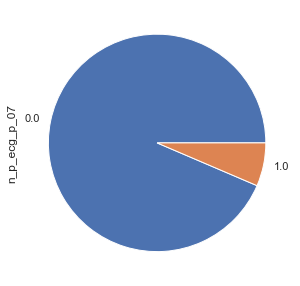

In [75]:
# LBBB (anterior branch) on ECG at the time of admission to hospital (n_p_ecg_p_07)
# 0: no
# 1: yes
data_raw.n_p_ecg_p_07.value_counts().plot(kind="pie",figsize=(5,5))

In [76]:
data_raw.n_p_ecg_p_07.value_counts()

0.0    1483
1.0     102
Name: n_p_ecg_p_07, dtype: int64

In [78]:
# Missing values
data_raw['n_p_ecg_p_07'].isna().sum()

115

71 - LBBB (posterior branch) on ECG at the time of admission to hospital 

<AxesSubplot:ylabel='n_p_ecg_p_08'>

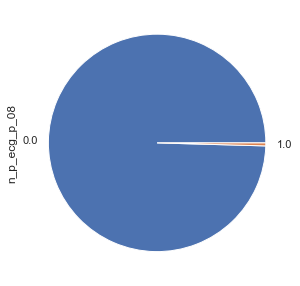

In [82]:
# LBBB (posterior branch) on ECG at the time of admission to hospital (n_p_ecg_p_08)
# 0: no
# 1: yes
data_raw.n_p_ecg_p_08.value_counts().plot(kind="pie",figsize=(5,5))

In [83]:
data_raw.n_p_ecg_p_08.value_counts()

0.0    1578
1.0       7
Name: n_p_ecg_p_08, dtype: int64

In [84]:
# Missing values
data_raw['n_p_ecg_p_08'].isna().sum()

115

72 - Incomplete LBBB on ECG at the time of admission to hospital 

<AxesSubplot:ylabel='n_p_ecg_p_09'>

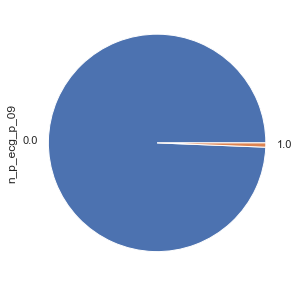

In [85]:
# Incomplete LBBB on ECG at the time of admission to hospital (n_p_ecg_p_09)
# 0: no
# 1: yes
data_raw.n_p_ecg_p_09.value_counts().plot(kind="pie",figsize=(5,5))

In [86]:
data_raw.n_p_ecg_p_09.value_counts()

0.0    1575
1.0      10
Name: n_p_ecg_p_09, dtype: int64

In [87]:
# Missing values
data_raw['n_p_ecg_p_09'].isna().sum()

115

73 - Complete LBBB on ECG at the time of admission to hospital

<AxesSubplot:ylabel='n_p_ecg_p_10'>

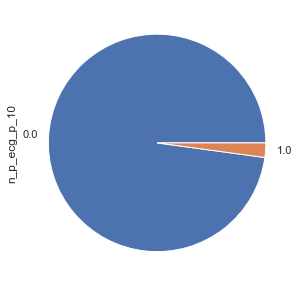

In [88]:
# Complete LBBB on ECG at the time of admission to hospital (n_p_ecg_p_10)
# 0: no
# 1: yes
data_raw.n_p_ecg_p_10.value_counts().plot(kind="pie",figsize=(5,5))

In [89]:
data_raw.n_p_ecg_p_10.value_counts()

0.0    1551
1.0      34
Name: n_p_ecg_p_10, dtype: int64

In [90]:
# Missing values
data_raw['n_p_ecg_p_10'].isna().sum()

115

74 - Incomplete RBBB on ECG at the time of admission to hospital 

<AxesSubplot:>

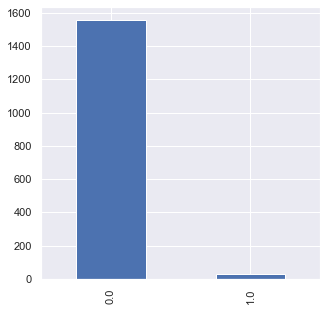

In [93]:
# Incomplete RBBB on ECG at the time of admission to hospital (n_p_ecg_p_11)
# 0: no
# 1: yes
data_raw.n_p_ecg_p_11.value_counts().plot(kind="bar",figsize=(5,5))

In [92]:
data_raw.n_p_ecg_p_11.value_counts()

0.0    1557
1.0      28
Name: n_p_ecg_p_11, dtype: int64

In [94]:
# Missing values
data_raw['n_p_ecg_p_11'].isna().sum()

115

75 - Complete RBBB on ECG at the time of admission to hospital 

<AxesSubplot:>

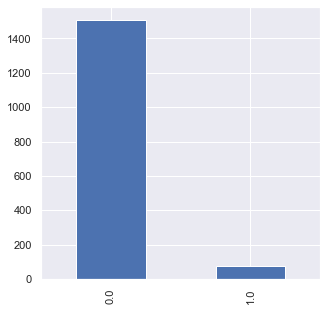

In [95]:
# Complete RBBB on ECG at the time of admission to hospital (n_p_ecg_p_12)
# 0: no
# 1: yes
data_raw.n_p_ecg_p_12.value_counts().plot(kind="bar",figsize=(5,5))

In [96]:
data_raw.n_p_ecg_p_12.value_counts()

0.0    1507
1.0      78
Name: n_p_ecg_p_12, dtype: int64

In [97]:
# Missing values
data_raw['n_p_ecg_p_12'].isna().sum()

115

76 - Fibrinolytic therapy by Ð¡Ðµliasum 750k IU

<AxesSubplot:>

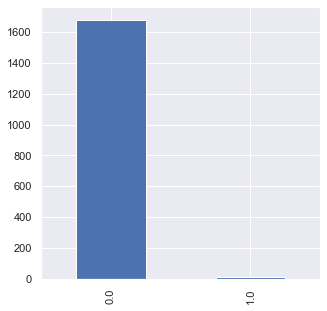

In [98]:
# Fibrinolytic therapy by Ð¡Ðµliasum 750k IU (fibr_ter_01)
# 0: no
# 1: yes
data_raw.fibr_ter_01.value_counts().plot(kind="bar",figsize=(5,5))

In [99]:
data_raw.fibr_ter_01.value_counts()

0.0    1677
1.0      13
Name: fibr_ter_01, dtype: int64

In [100]:
# Missing values
data_raw['fibr_ter_01'].isna().sum()

10

77 - Fibrinolytic therapy by Ð¡Ðµliasum 1m IU

<AxesSubplot:>

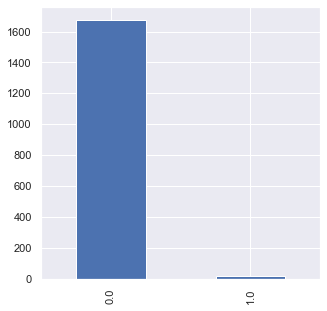

In [101]:
# Fibrinolytic therapy by Ð¡Ðµliasum 1m IU (fibr_ter_02)
# 0: no
# 1: yes
data_raw.fibr_ter_02.value_counts().plot(kind="bar",figsize=(5,5))

In [102]:
data_raw.fibr_ter_02.value_counts()

0.0    1674
1.0      16
Name: fibr_ter_02, dtype: int64

In [103]:
# Missing values
data_raw['fibr_ter_02'].isna().sum()

10

78 - Fibrinolytic therapy by Ð¡Ðµliasum 3m IU

<AxesSubplot:>

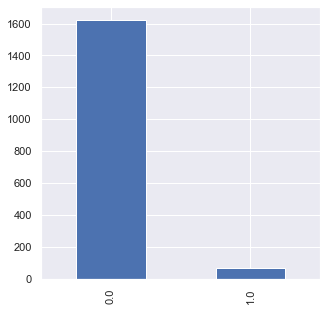

In [104]:
# Fibrinolytic therapy by Ð¡Ðµliasum 3m IU (fibr_ter_03)
# 0: no 
# 1: yes 
data_raw.fibr_ter_03.value_counts().plot(kind="bar",figsize=(5,5))

In [105]:
data_raw.fibr_ter_03.value_counts()

0.0    1622
1.0      68
Name: fibr_ter_03, dtype: int64

In [106]:
# Missing values
data_raw['fibr_ter_03'].isna().sum()

10

79 - Fibrinolytic therapy by Streptase

<AxesSubplot:>

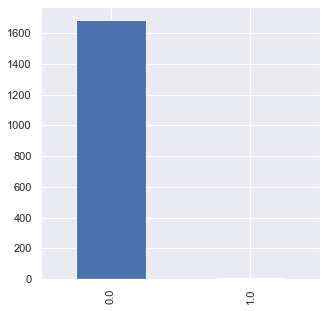

In [107]:
# Fibrinolytic therapy by Streptase (fibr_ter_05)
# 0: no
# 1: yes
data_raw.fibr_ter_05.value_counts().plot(kind="bar",figsize=(5,5))

In [108]:
data_raw.fibr_ter_05.value_counts()

0.0    1686
1.0       4
Name: fibr_ter_05, dtype: int64

In [109]:
# Missing values
data_raw['fibr_ter_05'].isna().sum()

10

80 - Fibrinolytic therapy by Ð¡Ðµliasum 500k IU

<AxesSubplot:>

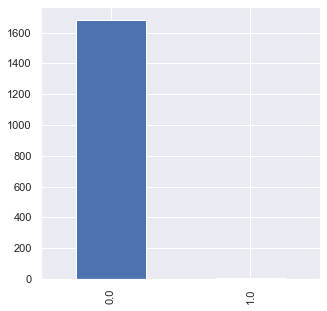

In [110]:
# Fibrinolytic therapy by Ð¡Ðµliasum 500k IU (fibr_ter_06)
# 0: no 
# 1: yes
data_raw.fibr_ter_06.value_counts().plot(kind="bar",figsize=(5,5))

In [111]:
data_raw.fibr_ter_06.value_counts()

0.0    1681
1.0       9
Name: fibr_ter_06, dtype: int64

In [112]:
# Missing values
data_raw['fibr_ter_06'].isna().sum()

10

81 - Fibrinolytic therapy by Ð¡Ðµliasum 250k IU 

<AxesSubplot:>

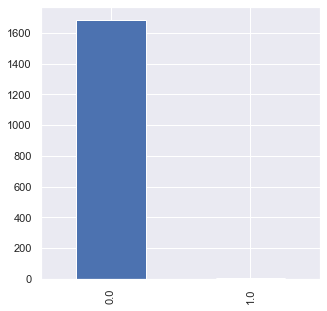

In [113]:
# Fibrinolytic therapy by Ð¡Ðµliasum 250k IU (fibr_ter_07)
# 0: no
# 1: yes
data_raw.fibr_ter_07.value_counts().plot(kind="bar",figsize=(5,5))

In [114]:
data_raw.fibr_ter_07.value_counts()

0.0    1684
1.0       6
Name: fibr_ter_07, dtype: int64

In [115]:
# Missing values
data_raw['fibr_ter_07'].isna().sum()

10

82 - Fibrinolytic therapy by Streptodecase 1.5m IU 

<AxesSubplot:>

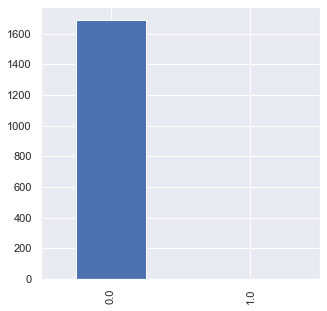

In [116]:
# Fibrinolytic therapy by Streptodecase 1.5m IU (fibr_ter_08)
# 0: no
# 1: yes
data_raw.fibr_ter_08.value_counts().plot(kind="bar",figsize=(5,5))

In [117]:
data_raw.fibr_ter_08.value_counts()

0.0    1688
1.0       2
Name: fibr_ter_08, dtype: int64

In [118]:
# Missing values
data_raw['fibr_ter_08'].isna().sum()

10

83 - Hypokalemia ( < 4 mmol/L)

<AxesSubplot:>

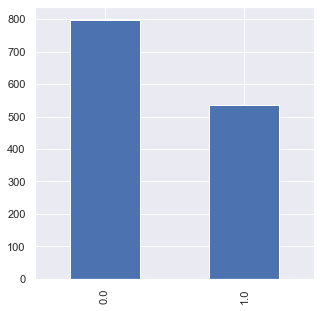

In [119]:
# Hypokalemia ( < 4 mmol/L) (GIPO_K)
# 0: no 
# 1: yes 
data_raw.GIPO_K.value_counts().plot(kind="bar",figsize=(5,5))

In [120]:
data_raw.GIPO_K.value_counts()

0.0    797
1.0    534
Name: GIPO_K, dtype: int64

In [121]:
# Missing values
data_raw['GIPO_K'].isna().sum()

369

84 - Serum potassium content (K_BLOOD)

<AxesSubplot:>

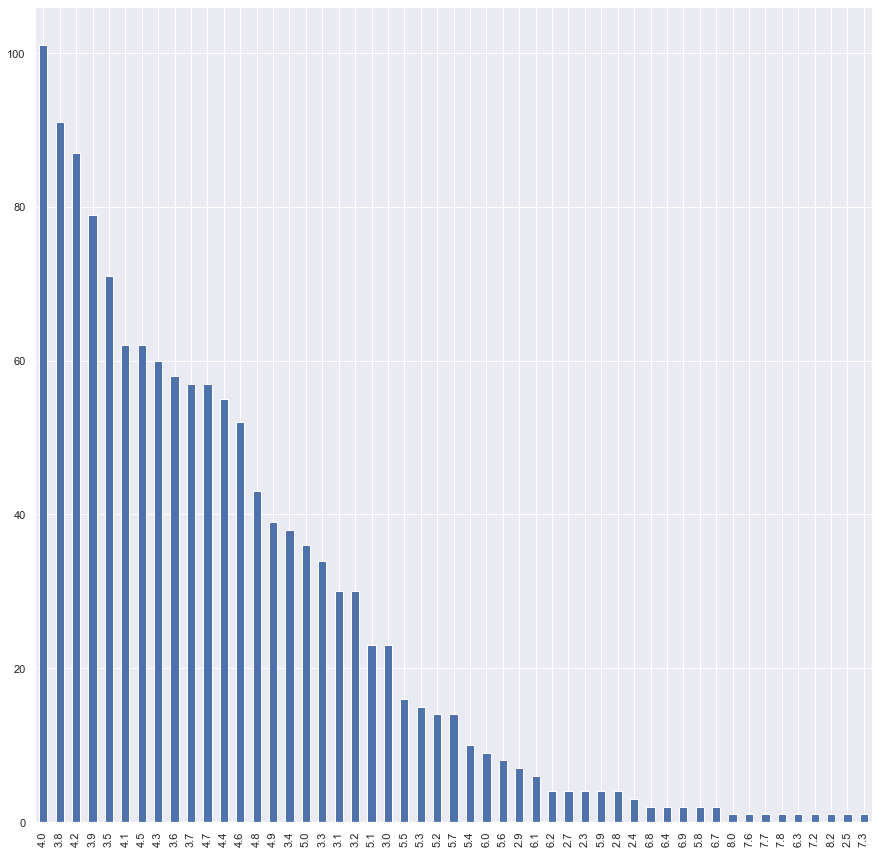

In [124]:
# Serum potassium content (K_BLOOD) (mmol/L)  - Real data
data_raw.K_BLOOD.value_counts().plot(kind="bar",figsize=(15,15))

In [130]:
data_raw.K_BLOOD.value_counts().sort_values

<bound method Series.sort_values of 4.0    101
3.8     91
4.2     87
3.9     79
3.5     71
4.1     62
4.5     62
4.3     60
3.6     58
3.7     57
4.7     57
4.4     55
4.6     52
4.8     43
4.9     39
3.4     38
5.0     36
3.3     34
3.1     30
3.2     30
5.1     23
3.0     23
5.5     16
5.3     15
5.2     14
5.7     14
5.4     10
6.0      9
5.6      8
2.9      7
6.1      6
6.2      4
2.7      4
2.3      4
5.9      4
2.8      4
2.4      3
6.8      2
6.4      2
6.9      2
5.8      2
6.7      2
8.0      1
7.6      1
7.7      1
7.8      1
6.3      1
7.2      1
8.2      1
2.5      1
7.3      1
Name: K_BLOOD, dtype: int64>

In [126]:
# Missing values
data_raw['K_BLOOD'].isna().sum()

371

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K_BLOOD'>

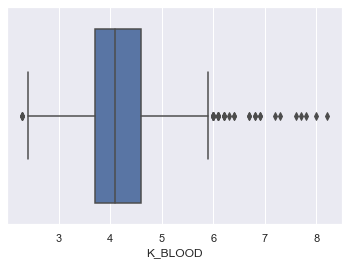

In [127]:
# Outliers
sns.boxplot(data_raw['K_BLOOD']) # Has to remove outliers

85 - Increase of sodium in serum (more than 150 mmol/L)

<AxesSubplot:>

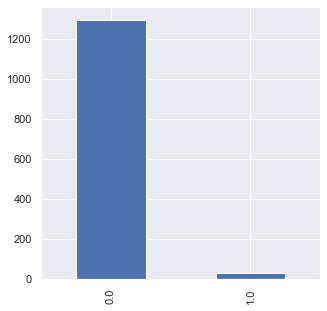

In [132]:
# Increase of sodium in serum (more than 150 mmol/L) (GIPER_Na)
# 0: no
# 1: yes
data_raw.GIPER_NA.value_counts().plot(kind="bar",figsize=(5,5))

In [133]:
data_raw.GIPER_NA.value_counts()

0.0    1295
1.0      30
Name: GIPER_NA, dtype: int64

In [134]:
# Missing values
data_raw['GIPER_NA'].isna().sum()

375

86 - Serum sodium content (Na_BLOOD)

<AxesSubplot:>

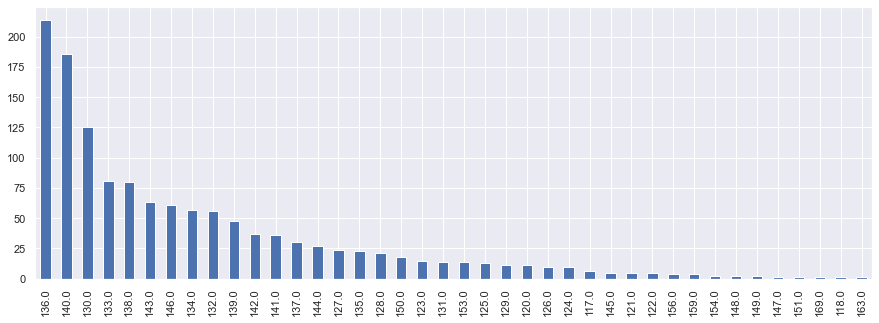

In [138]:
# Serum sodium content (Na_BLOOD) (mmol/L)
data_raw.NA_BLOOD.value_counts().plot(kind="bar",figsize=(15,5))

In [139]:
data_raw.NA_BLOOD.value_counts()

136.0    214
140.0    186
130.0    125
133.0     81
138.0     80
143.0     63
146.0     61
134.0     57
132.0     56
139.0     48
142.0     37
141.0     36
137.0     30
144.0     27
127.0     24
135.0     23
128.0     21
150.0     18
123.0     15
131.0     14
153.0     14
125.0     13
129.0     11
120.0     11
126.0     10
124.0     10
117.0      6
145.0      5
121.0      5
122.0      5
156.0      4
159.0      4
154.0      2
148.0      2
149.0      2
147.0      1
151.0      1
169.0      1
118.0      1
163.0      1
Name: NA_BLOOD, dtype: int64

In [140]:
# Missing values
data_raw['NA_BLOOD'].isna().sum()

375

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NA_BLOOD'>

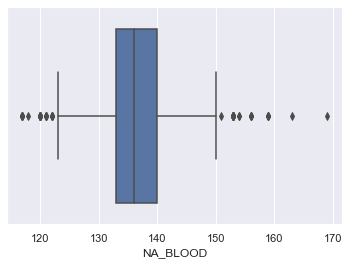

In [141]:
# Outliers
sns.boxplot(data_raw['NA_BLOOD']) # Need to treat outliers

87 - Serum AlAT content (ALT_BLOOD)

<AxesSubplot:>

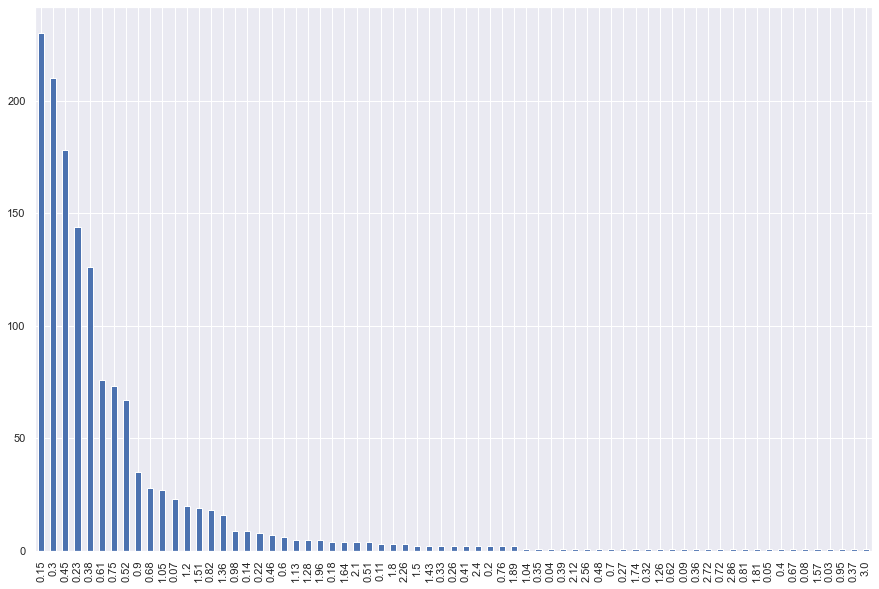

In [143]:
# Serum AlAT content (ALT_BLOOD) (IU/L)
data_raw.ALT_BLOOD.value_counts().plot(kind="bar",figsize=(15,10))

In [144]:
data_raw.ALT_BLOOD.value_counts()

0.15    230
0.30    210
0.45    178
0.23    144
0.38    126
       ... 
1.57      1
0.03      1
0.95      1
0.37      1
3.00      1
Name: ALT_BLOOD, Length: 69, dtype: int64

In [145]:
# Missing values
data_raw['ALT_BLOOD'].isna().sum()

284

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ALT_BLOOD'>

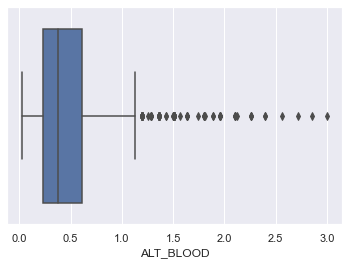

In [146]:
# Outliers
sns.boxplot(data_raw['ALT_BLOOD'])

88 - Serum AsAT content (AST_BLOOD)

<AxesSubplot:>

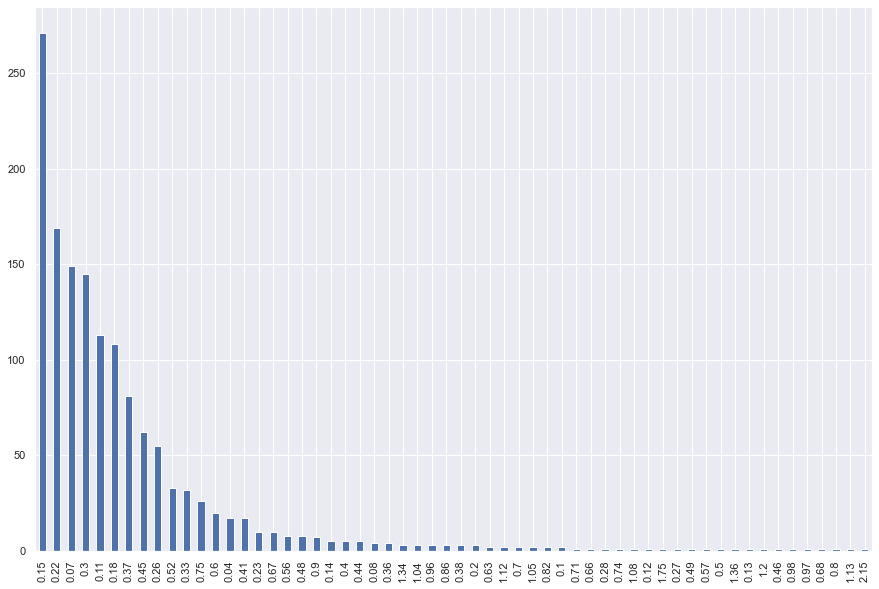

In [147]:
# Serum AsAT content (AST_BLOOD) (IU/L)
data_raw.AST_BLOOD.value_counts().plot(kind="bar",figsize=(15,10))

In [149]:
data_raw.AST_BLOOD.value_counts().sort_values()

2.15      1
0.71      1
0.66      1
0.28      1
0.74      1
1.08      1
1.75      1
0.27      1
0.49      1
0.57      1
0.12      1
1.36      1
0.50      1
0.68      1
0.97      1
0.98      1
0.80      1
1.20      1
0.13      1
0.46      1
1.13      1
0.10      2
0.82      2
1.05      2
0.70      2
1.12      2
0.63      2
0.38      3
0.20      3
0.86      3
1.04      3
1.34      3
0.96      3
0.36      4
0.08      4
0.44      5
0.40      5
0.14      5
0.90      7
0.48      8
0.56      8
0.67     10
0.23     10
0.04     17
0.41     17
0.60     20
0.75     26
0.33     32
0.52     33
0.26     55
0.45     62
0.37     81
0.18    108
0.11    113
0.30    145
0.07    149
0.22    169
0.15    271
Name: AST_BLOOD, dtype: int64

In [150]:
# Missing values
data_raw['AST_BLOOD'].isna().sum()

285

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AST_BLOOD'>

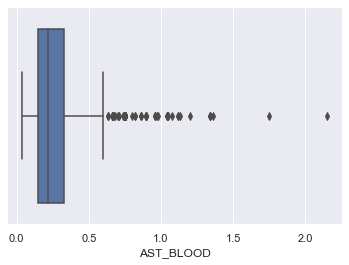

In [151]:
# Outliers
sns.boxplot(data_raw['AST_BLOOD'])

89 - Serum CPK content (KFK_BLOOD)

<AxesSubplot:>

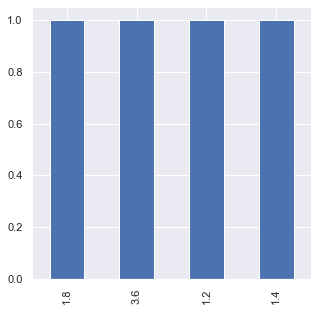

In [153]:
# Serum CPK content (KFK_BLOOD) (IU/L)
data_raw.KFK_BLOOD.value_counts().plot(kind="bar",figsize=(5,5))

In [154]:
data_raw.KFK_BLOOD.value_counts()

1.8    1
3.6    1
1.2    1
1.4    1
Name: KFK_BLOOD, dtype: int64

In [155]:
# Missing values
data_raw['KFK_BLOOD'].isna().sum() # only 4 values out of 1700 observation

1696

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KFK_BLOOD'>

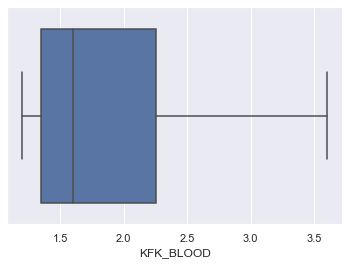

In [156]:
# Outliers
sns.boxplot(data_raw['KFK_BLOOD']) # No outliers but lot of na values in this variable

90 - White blood cell count (billions per liter) 

<AxesSubplot:>

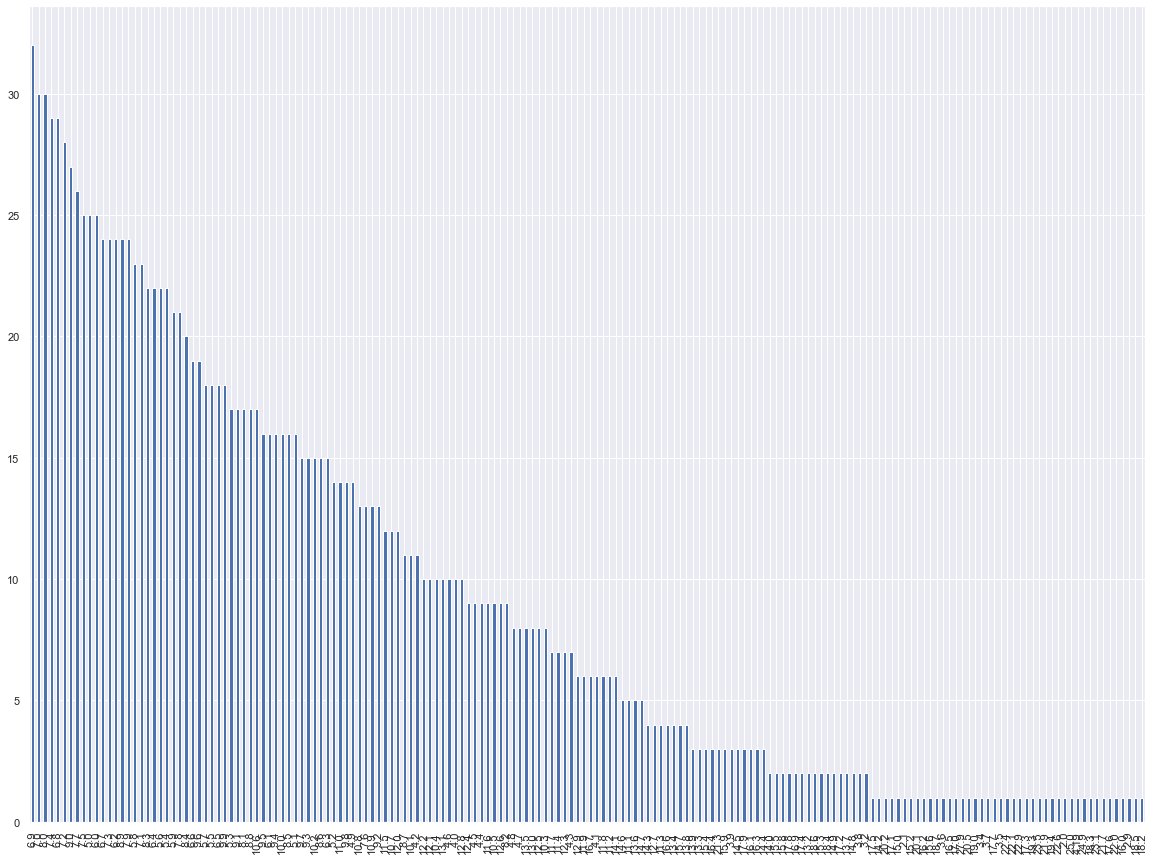

In [166]:
# White blood cell count (billions per liter) (L_BLOOD)
data_raw.L_BLOOD.value_counts().plot(kind="bar",figsize=(20,15))

In [161]:
data_raw.L_BLOOD.value_counts().sort_values()

18.2     1
3.4      1
19.0     1
20.5     1
27.9     1
        ..
6.8     29
7.4     29
8.0     30
7.0     30
6.9     32
Name: L_BLOOD, Length: 174, dtype: int64

In [164]:
# Missing values
data_raw['L_BLOOD'].isna().sum()

125

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='L_BLOOD'>

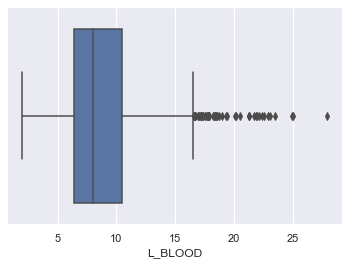

In [165]:
# Outliers
sns.boxplot(data_raw['L_BLOOD'])

91 - ESR (Erythrocyte sedimentation rate)

<AxesSubplot:>

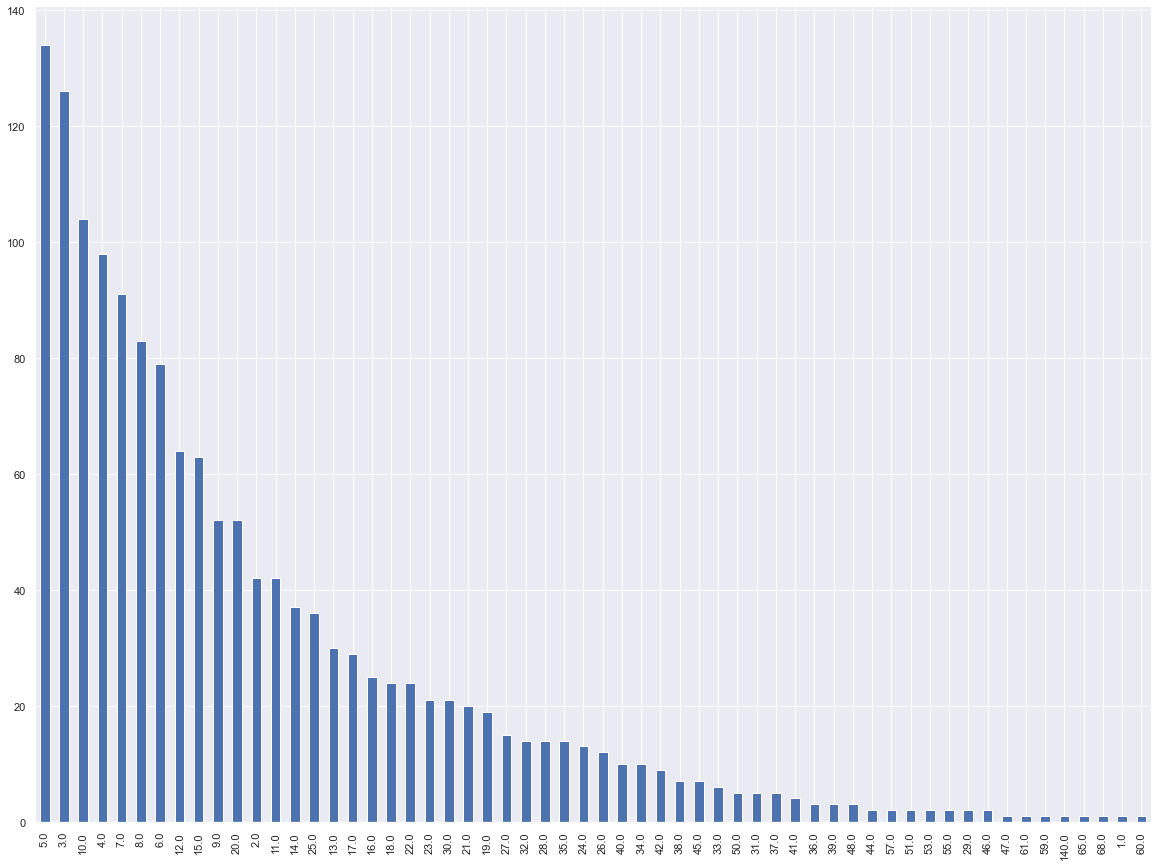

In [167]:
# ESR (Erythrocyte sedimentation rate) (ROE) (Ð¼Ð¼)
data_raw.ROE.value_counts().plot(kind="bar",figsize=(20,15))

In [168]:
data_raw.ROE.value_counts()

5.0      134
3.0      126
10.0     104
4.0       98
7.0       91
8.0       83
6.0       79
12.0      64
15.0      63
9.0       52
20.0      52
2.0       42
11.0      42
14.0      37
25.0      36
13.0      30
17.0      29
16.0      25
18.0      24
22.0      24
23.0      21
30.0      21
21.0      20
19.0      19
27.0      15
32.0      14
28.0      14
35.0      14
24.0      13
26.0      12
40.0      10
34.0      10
42.0       9
38.0       7
45.0       7
33.0       6
50.0       5
31.0       5
37.0       5
41.0       4
36.0       3
39.0       3
48.0       3
44.0       2
57.0       2
51.0       2
53.0       2
55.0       2
29.0       2
46.0       2
47.0       1
61.0       1
59.0       1
140.0      1
65.0       1
68.0       1
1.0        1
60.0       1
Name: ROE, dtype: int64

In [169]:
# Missing values
data_raw['ROE'].isna().sum()

203

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ROE'>

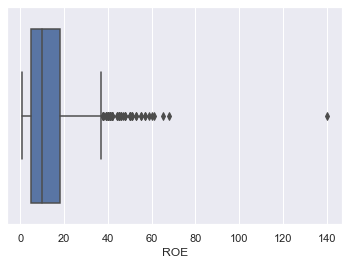

In [171]:
# Outliers
sns.boxplot(data_raw['ROE'])

92 - Time elapsed from the beginning of the attack of CHD to the hospital

<AxesSubplot:>

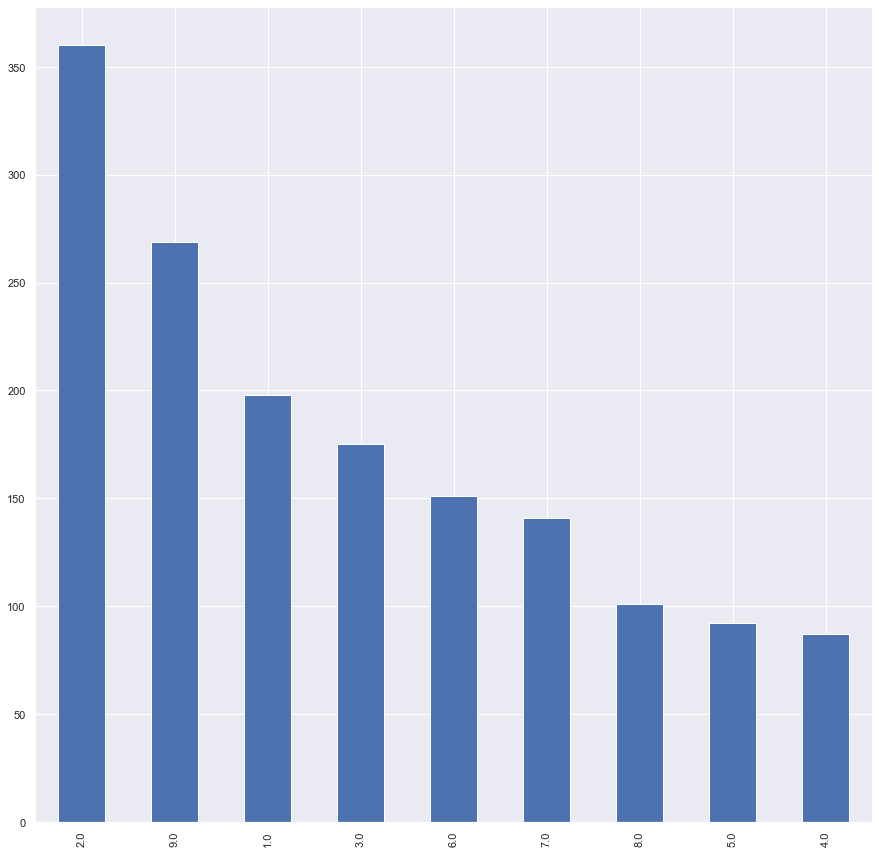

In [173]:
# Time elapsed from the beginning of the attack of CHD to the hospital (TIME_B_S)
# 1: less than 2 hours
# 2: 2-4 hours 
# 3: 4-6 hours 
# 4: 6-8 hours 
# 5: 8-12 hours
# 6: 12-24 hours
# 7: more than 1 days
# 8: more than 2 days
# 9: more than 3 days
data_raw.TIME_B_S.value_counts().plot(kind="bar",figsize=(15,15))

In [174]:
data_raw.TIME_B_S.value_counts()

2.0    360
9.0    269
1.0    198
3.0    175
6.0    151
7.0    141
8.0    101
5.0     92
4.0     87
Name: TIME_B_S, dtype: int64

In [176]:
# Missing values
data_raw['TIME_B_S'].isna().sum()

126

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TIME_B_S'>

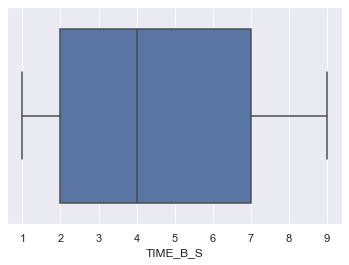

In [175]:
# Outliers
sns.boxplot(data_raw['TIME_B_S'])

93 - Relapse of the pain in the first hours of the hospital period

<AxesSubplot:>

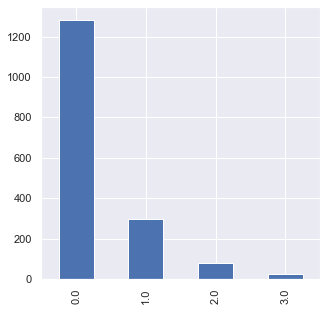

In [180]:
# Relapse of the pain in the first hours of the hospital period (R_AB_1_n)
# 0: there is no relapse
# 1: only one
# 2: 2 times 
# 3: 3 or more times
data_raw.R_AB_1_n.value_counts().plot(kind="bar",figsize=(5,5))

In [181]:
data_raw.R_AB_1_n.value_counts()

0.0    1282
1.0     298
2.0      78
3.0      26
Name: R_AB_1_n, dtype: int64

In [182]:
# Missing values
data_raw['R_AB_1_n'].isna().sum()

16

94 - Relapse of the pain in the second day of the hospital period

<AxesSubplot:>

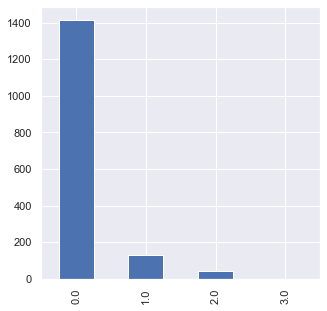

In [184]:
# Relapse of the pain in the second day of the hospital period (R_AB_2_n)
# 0: there is no relapse
# 1: only one
# 2: 2 times
# 3: 3 or more times
data_raw.R_AB_2_n.value_counts().plot(kind="bar",figsize=(5,5))

In [185]:
data_raw.R_AB_2_n.value_counts()

0.0    1414
1.0     133
2.0      44
3.0       1
Name: R_AB_2_n, dtype: int64

In [186]:
# Missing values
data_raw['R_AB_2_n'].isna().sum()

108

95 - Relapse of the pain in the third day of the hospital period 

<AxesSubplot:>

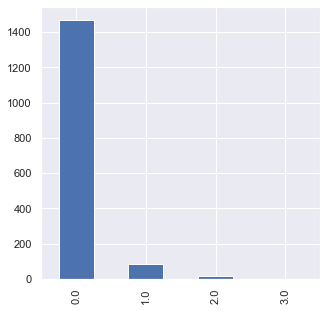

In [187]:
# Relapse of the pain in the third day of the hospital period (R_AB_3_n)
# 0: there is no relapse
# 1: only one
# 2: 2 times
# 3: 3 or more times 
data_raw.R_AB_3_n.value_counts().plot(kind="bar",figsize=(5,5))

In [188]:
data_raw.R_AB_3_n.value_counts()

0.0    1469
1.0      86
2.0      15
3.0       2
Name: R_AB_3_n, dtype: int64

In [189]:
# Missing values
data_raw['R_AB_3_n'].isna().sum()

128

96 - Use of opioid drugs by the Emergency Cardiology Team

<AxesSubplot:>

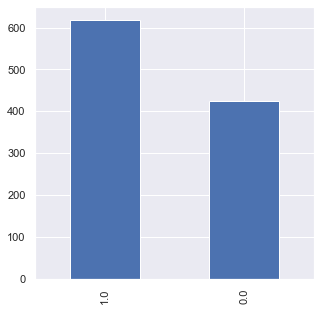

In [190]:
# Use of opioid drugs by the Emergency Cardiology Team (NA_KB)
# 0: no
# 1: yes
data_raw.NA_KB.value_counts().plot(kind="bar",figsize=(5,5))

In [191]:
data_raw.NA_KB.value_counts()

1.0    618
0.0    425
Name: NA_KB, dtype: int64

In [192]:
# Missing values
data_raw['NA_KB'].isna().sum()

657

97 - Use of NSAIDs by the Emergency Cardiology Team

<AxesSubplot:>

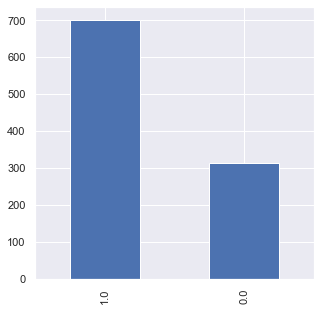

In [193]:
# Use of NSAIDs by the Emergency Cardiology Team (NOT_NA_KB)
# 0: no
# 1: yes
data_raw.NOT_NA_KB.value_counts().plot(kind="bar",figsize=(5,5))

In [194]:
data_raw.NOT_NA_KB.value_counts()

1.0    701
0.0    313
Name: NOT_NA_KB, dtype: int64

In [195]:
# Missing values
data_raw['NOT_NA_KB'].isna().sum()

686

98 - Use of lidocaine by the Emergency Cardiology Team

<AxesSubplot:>

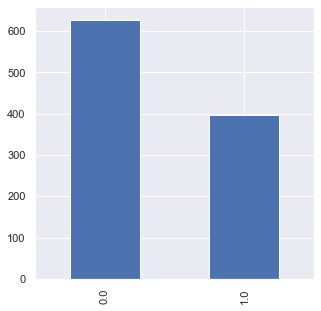

In [196]:
# Use of lidocaine by the Emergency Cardiology Team (LID_KB)
# 0: no 
# 1: yes
data_raw.LID_KB.value_counts().plot(kind="bar",figsize=(5,5))

In [197]:
data_raw.LID_KB.value_counts()

0.0    627
1.0    396
Name: LID_KB, dtype: int64

In [198]:
# Missing values
data_raw['LID_KB'].isna().sum()

677

99 - Use of liquid nitrates in the ICU

<AxesSubplot:>

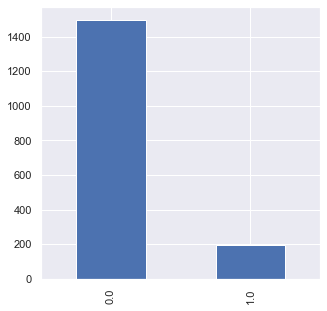

In [199]:
# Use of liquid nitrates in the ICU (NITR_S)
# 0: no
# 1: yes 
data_raw.NITR_S.value_counts().plot(kind="bar",figsize=(5,5))

In [200]:
data_raw.NITR_S.value_counts()

0.0    1496
1.0     195
Name: NITR_S, dtype: int64

In [201]:
# Missing values
data_raw['NITR_S'].isna().sum()

9

100 - Use of opioid drugs in the ICU in the first hours of the hospital period

<AxesSubplot:>

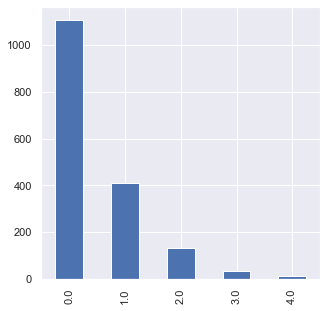

In [202]:
# Use of opioid drugs in the ICU in the first hours of the hospital period (NA_R_1_n)
# 0: no
# 1: once
# 2: twice
# 3: three times 
# 4: four times 
data_raw.NA_R_1_n.value_counts().plot(kind="bar",figsize=(5,5))

In [203]:
data_raw.NA_R_1_n.value_counts()

0.0    1108
1.0     409
2.0     132
3.0      35
4.0      11
Name: NA_R_1_n, dtype: int64

In [204]:
# Missing values
data_raw['NA_R_1_n'].isna().sum()

5

101 - Use of opioid drugs in the ICU in the second day of the hospital period

<AxesSubplot:>

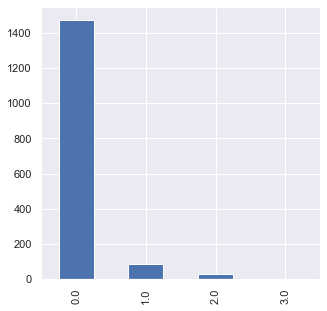

In [205]:
# Use of opioid drugs in the ICU in the second day of the hospital period (NA_R_2_n)
# 0: no 
# 1: once 
# 2: twice
# 3: three times
data_raw.NA_R_2_n.value_counts().plot(kind="bar",figsize=(5,5))

In [206]:
data_raw.NA_R_2_n.value_counts()

0.0    1474
1.0      87
2.0      30
3.0       1
Name: NA_R_2_n, dtype: int64

In [207]:
# Missing values
data_raw['NA_R_2_n'].isna().sum()

108

102 - Use of opioid drugs in the ICU in the third day of the hospital period 

<AxesSubplot:>

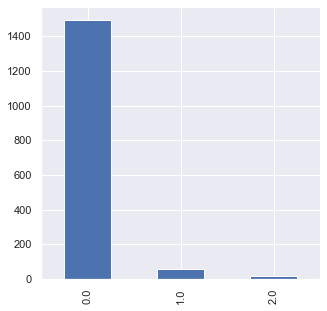

In [208]:
# Use of opioid drugs in the ICU in the third day of the hospital period (NA_R_3_n)
# 0: no 
# 1: once 
# 2: twice
data_raw.NA_R_3_n.value_counts().plot(kind="bar",figsize=(5,5))

In [209]:
data_raw.NA_R_3_n.value_counts()

0.0    1493
1.0      60
2.0      16
Name: NA_R_3_n, dtype: int64

In [210]:
# Missing values
data_raw['NA_R_3_n'].isna().sum()

131

103 - Use of NSAIDs in the ICU in the first hours of the hospital period

<AxesSubplot:>

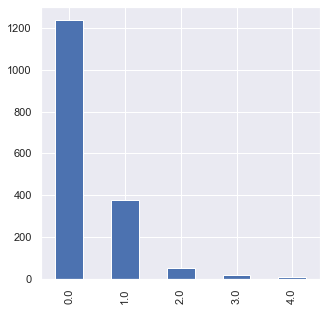

In [211]:
# Use of NSAIDs in the ICU in the first hours of the hospital period (NOT_NA_1_n)
# 0: no
# 1: once 
# 2: twice
# 3: three times
# 4: four or more times
data_raw.NOT_NA_1_n.value_counts().plot(kind="bar",figsize=(5,5))

In [212]:
data_raw.NOT_NA_1_n.value_counts()

0.0    1237
1.0     376
2.0      53
3.0      17
4.0       7
Name: NOT_NA_1_n, dtype: int64

In [213]:
# Missing values
data_raw['NOT_NA_1_n'].isna().sum()

10

104 - Use of NSAIDs in the ICU in the second day of the hospital period 

<AxesSubplot:>

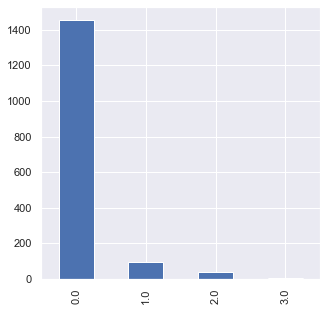

In [215]:
# Use of NSAIDs in the ICU in the second day of the hospital period (NOT_NA_2_n)
# 0: no
# 1: once 
# 2: twice 
# 3: three times
data_raw.NOT_NA_2_n.value_counts().plot(kind="bar",figsize=(5,5))

In [216]:
data_raw.NOT_NA_2_n.value_counts()

0.0    1454
1.0      95
2.0      38
3.0       3
Name: NOT_NA_2_n, dtype: int64

In [217]:
# Missing values
data_raw['NOT_NA_2_n'].isna().sum()

110

105 - Use of NSAIDs in the ICU in the third day of the hospital period

<AxesSubplot:>

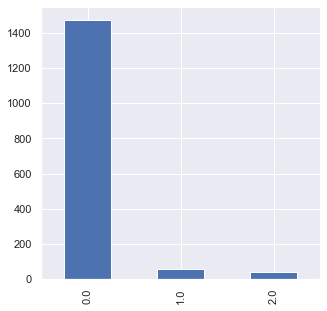

In [218]:
# Use of NSAIDs in the ICU in the third day of the hospital period (NOT_NA_3_n)
# 0: no
# 1: once
# 2: twice 
data_raw.NOT_NA_3_n.value_counts().plot(kind="bar",figsize=(5,5))

In [219]:
data_raw.NOT_NA_3_n.value_counts()

0.0    1474
1.0      57
2.0      38
Name: NOT_NA_3_n, dtype: int64

In [220]:
# Missing values
data_raw['NOT_NA_3_n'].isna().sum()

131

106 - Use of lidocaine in the ICU 

<AxesSubplot:>

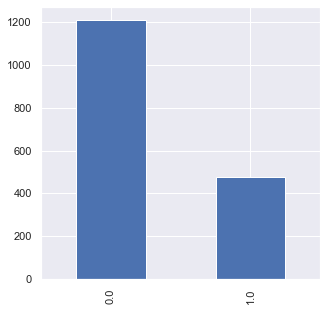

In [221]:
# Use of lidocaine in the ICU (LID_S_n)
# 0: no 
# 1: yes
data_raw.LID_S_n.value_counts().plot(kind="bar",figsize=(5,5))

In [222]:
data_raw.LID_S_n.value_counts()

0.0    1211
1.0     479
Name: LID_S_n, dtype: int64

In [223]:
# Missing values
data_raw['LID_S_n'].isna().sum()

10

107 - Use of beta-blockers in the ICU 

<AxesSubplot:>

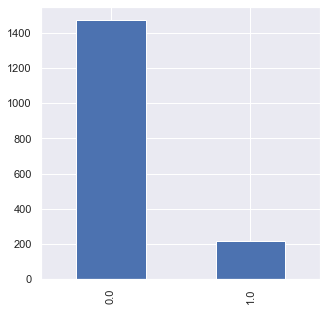

In [224]:
# Use of beta-blockers in the ICU (B_BLOK_S_n)
# 0: no
# 1: yes
data_raw.B_BLOK_S_n.value_counts().plot(kind="bar",figsize=(5,5))

In [225]:
data_raw.B_BLOK_S_n.value_counts()

0.0    1474
1.0     215
Name: B_BLOK_S_n, dtype: int64

In [226]:
# Missing values
data_raw['B_BLOK_S_n'].isna().sum()

11

108 - Use of calcium channel blockers in the ICU 

<AxesSubplot:>

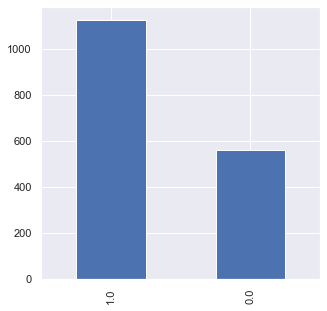

In [227]:
# Use of calcium channel blockers in the ICU (ANT_CA_S_n)
# 0: no
# 1: yes
data_raw.ANT_CA_S_n.value_counts().plot(kind="bar",figsize=(5,5))

In [228]:
data_raw.ANT_CA_S_n.value_counts()

1.0    1125
0.0     562
Name: ANT_CA_S_n, dtype: int64

In [229]:
# Missing values
data_raw['ANT_CA_S_n'].isna().sum()

13

109 - Use of Ð° anticoagulants (heparin) in the ICU 

<AxesSubplot:>

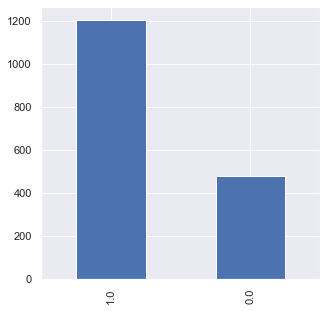

In [230]:
# Use of Ð° anticoagulants (heparin) in the ICU (GEPAR_S_n)
# 0: no
# 1: yes
data_raw.GEPAR_S_n.value_counts().plot(kind="bar",figsize=(5,5))

In [231]:
data_raw.GEPAR_S_n.value_counts()

1.0    1203
0.0     480
Name: GEPAR_S_n, dtype: int64

In [232]:
# Missing values
data_raw['GEPAR_S_n'].isna().sum()

17

110 - Use of acetylsalicylic acid in the ICU

<AxesSubplot:>

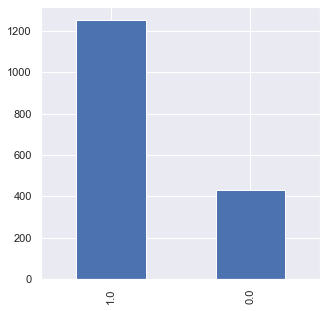

In [233]:
# Use of acetylsalicylic acid in the ICU (ASP_S_n)
# 0: no
# 1: yes
data_raw.ASP_S_n.value_counts().plot(kind="bar",figsize=(5,5))

In [234]:
data_raw.ASP_S_n.value_counts()

1.0    1252
0.0     431
Name: ASP_S_n, dtype: int64

In [235]:
# Missing values
data_raw['ASP_S_n'].isna().sum()

17

111 - Use of Ticlid in the ICU 

<AxesSubplot:>

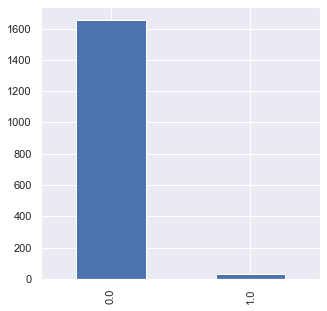

In [236]:
# Use of Ticlid in the ICU (TIKL_S_n)
# 0: no
# 1: yes
data_raw.TIKL_S_n.value_counts().plot(kind="bar",figsize=(5,5))

In [237]:
data_raw.TIKL_S_n.value_counts()

0.0    1654
1.0      30
Name: TIKL_S_n, dtype: int64

In [238]:
# Missing values
data_raw['TIKL_S_n'].isna().sum()

16

112 - Use of Trental in the ICU

<AxesSubplot:>

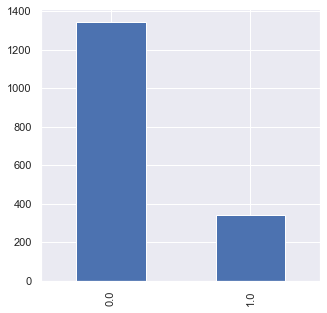

In [239]:
# Use of Trental in the ICU (TRENT_S_n)
# 0: no
# 1: yes
data_raw.TRENT_S_n.value_counts().plot(kind="bar",figsize=(5,5))

In [240]:
data_raw.TRENT_S_n.value_counts()

0.0    1343
1.0     341
Name: TRENT_S_n, dtype: int64

In [241]:
# Missing values
data_raw['TRENT_S_n'].isna().sum()

16

113 - Atrial fibrillation 

<AxesSubplot:>

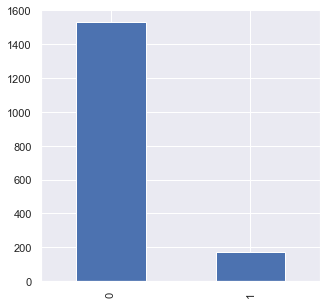

In [242]:
# Atrial fibrillation (FIBR_PREDS)
# 0: no 
# 1: yes
data_raw.FIBR_PREDS.value_counts().plot(kind="bar",figsize=(5,5))

In [243]:
data_raw.FIBR_PREDS.value_counts()

0    1530
1     170
Name: FIBR_PREDS, dtype: int64

In [244]:
# Missing values
data_raw['FIBR_PREDS'].isna().sum()

0

114 - Supraventricular tachycardia

<AxesSubplot:>

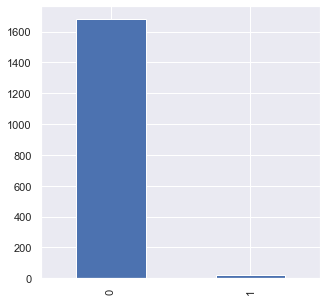

In [245]:
#  Supraventricular tachycardia (PREDS_TAH)
# 0: no
# 1: yes
data_raw.PREDS_TAH.value_counts().plot(kind="bar",figsize=(5,5))

In [246]:
data_raw.PREDS_TAH.value_counts()

0    1680
1      20
Name: PREDS_TAH, dtype: int64

In [247]:
# Missing values
data_raw['PREDS_TAH'].isna().sum()

0

115 - Ventricular tachycardia 

<AxesSubplot:>

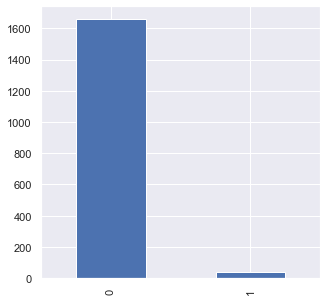

In [248]:
# Ventricular tachycardia (JELUD_TAH)
# 0: no
# 1: yes
data_raw.JELUD_TAH.value_counts().plot(kind="bar",figsize=(5,5))

In [249]:
data_raw.JELUD_TAH.value_counts()

0    1658
1      42
Name: JELUD_TAH, dtype: int64

In [250]:
# Missing values
data_raw['JELUD_TAH'].isna().sum()

0

116 - Ventricular fibrillation

<AxesSubplot:>

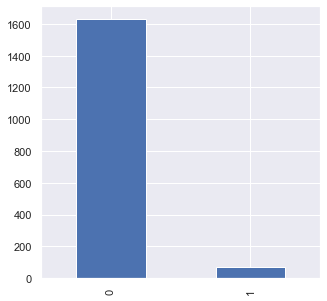

In [254]:
# Ventricular fibrillation (FIBR_JELUD)
# 0: no 
# 1: yes
data_raw.FIBR_JELUD.value_counts().plot(kind="bar",figsize=(5,5))

In [252]:
data_raw.FIBR_JELUD.value_counts()

0    1629
1      71
Name: FIBR_JELUD, dtype: int64

In [253]:
# Missing values
data_raw['FIBR_JELUD'].isna().sum()

0

117 - Third-degree AV block

<AxesSubplot:>

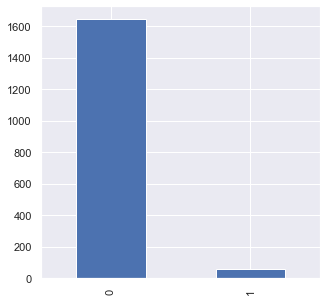

In [255]:
# Third-degree AV block (A_V_BLOK)
# 0: no
# 1: yes
data_raw.A_V_BLOK.value_counts().plot(kind="bar",figsize=(5,5))

In [256]:
data_raw.A_V_BLOK.value_counts()

0    1643
1      57
Name: A_V_BLOK, dtype: int64

In [257]:
# Missing values
data_raw['A_V_BLOK'].isna().sum()

0

118 - Pulmonary edema

<AxesSubplot:>

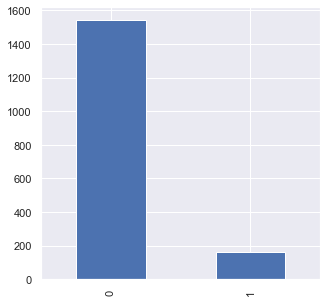

In [258]:
# Pulmonary edema (OTEK_LANC)
# 0: no 
# 1: yes 
data_raw.OTEK_LANC.value_counts().plot(kind="bar",figsize=(5,5))

In [259]:
data_raw.OTEK_LANC.value_counts()

0    1541
1     159
Name: OTEK_LANC, dtype: int64

In [260]:
# Missing values
data_raw['OTEK_LANC'].isna().sum()

0

119 - Myocardial rupture

<AxesSubplot:>

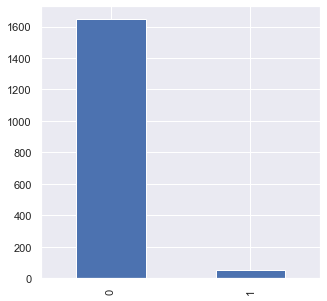

In [261]:
# Myocardial rupture (RAZRIV)
# 0: no
# 1: yes
data_raw.RAZRIV.value_counts().plot(kind="bar",figsize=(5,5))

In [262]:
data_raw.RAZRIV.value_counts()

0    1646
1      54
Name: RAZRIV, dtype: int64

In [265]:
# Missing values
data_raw['RAZRIV'].isna().sum()

0

120 - Dressler syndrome

<AxesSubplot:>

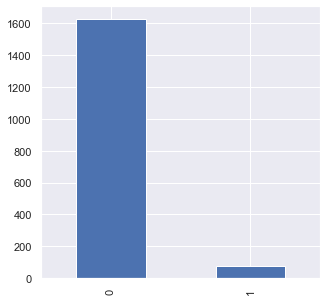

In [263]:
# Dressler syndrome (DRESSLER)
# 0: no
# 1: yes
data_raw.DRESSLER.value_counts().plot(kind="bar",figsize=(5,5))

In [264]:
data_raw.DRESSLER.value_counts()

0    1625
1      75
Name: DRESSLER, dtype: int64

In [266]:
# Missing values
data_raw['DRESSLER'].isna().sum()

0

121 - Chronic heart failure 

<AxesSubplot:>

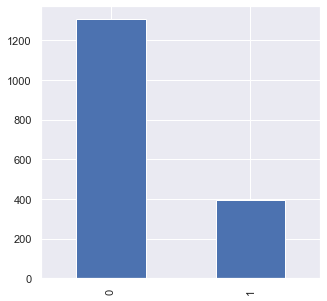

In [267]:
# Chronic heart failure (ZSN)
# 0: no
# 1: yes
data_raw.ZSN.value_counts().plot(kind="bar",figsize=(5,5))

In [268]:
data_raw.ZSN.value_counts()

0    1306
1     394
Name: ZSN, dtype: int64

In [269]:
# Missing values
data_raw['ZSN'].isna().sum()

0

122 - Relapse of the myocardial infarction 

<AxesSubplot:>

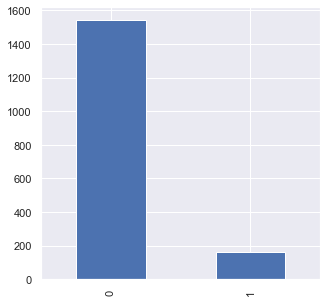

In [270]:
# Relapse of the myocardial infarction (REC_IM)
# 0: no
# 1: yes
data_raw.REC_IM.value_counts().plot(kind="bar",figsize=(5,5))

In [271]:
data_raw.REC_IM.value_counts()

0    1541
1     159
Name: REC_IM, dtype: int64

In [272]:
# Missing values
data_raw['REC_IM'].isna().sum()

0

123 - Post-infarction angina 

<AxesSubplot:>

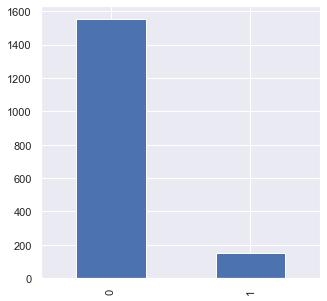

In [273]:
# Post-infarction angina (P_IM_STEN)
# 0: no 
# 1: yes 
data_raw.P_IM_STEN.value_counts().plot(kind="bar",figsize=(5,5))

In [274]:
data_raw.P_IM_STEN.value_counts()

0    1552
1     148
Name: P_IM_STEN, dtype: int64

In [275]:
# Missing values
data_raw['P_IM_STEN'].isna().sum()

0

124 - Lethal outcome (cause)

<AxesSubplot:>

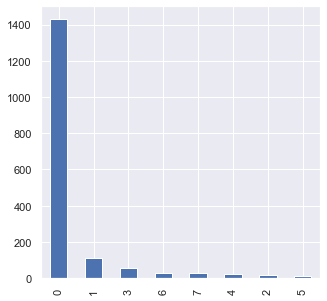

In [276]:
# Lethal outcome (cause) (LET_IS)
# 0: unknown (alive) 
# 1: cardiogenic shock
# 2: pulmonary edema
# 3: myocardial rupture 
# 4: progress of congestive heart failure
# 5: thromboembolism 
# 6: asystole
# 7: ventricular fibrillation 
data_raw.LET_IS.value_counts().plot(kind="bar",figsize=(5,5))

In [277]:
data_raw.LET_IS.value_counts()

0    1429
1     110
3      54
6      27
7      27
4      23
2      18
5      12
Name: LET_IS, dtype: int64

In [278]:
# Missing values
data_raw['LET_IS'].isna().sum()

0